<a href="https://colab.research.google.com/github/mobdoe/mobdoe.github.io/blob/master/Module_25_1_Sprvsd_Lrng_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook
1. Find dataset
2. EDA
3. Model outcome of interest
----
### Slide Deck
1. Research question
2. Model specification and alternative comparison
3. Practical uses of model
4. Any weak points / short comings

The dataset I will be using will be from Classy.org. Specifically, I will be looking at two reports:
1. Fundraising Page report (19 features / 1392 samples)
2. Transaction Report

My research topic will be on whether or not  a fundraising page will hit it's goal (classification), given the data we've collected. The main report is the fundraising page report; however, I will need to create some features using the data from the transaction report.

### Import and Explore Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fundraising_pages.csv to fundraising_pages.csv


In [ ]:
import io
import pandas as pd 

fp_df = pd.read_csv(io.BytesIO(uploaded['fundraising_pages.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
fp_df.info()
fp_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fundraising Page ID           1393 non-null   int64  
 1   Fundraising Page Name         1393 non-null   object 
 2   Fundraiser Full Name          1393 non-null   object 
 3   Fundraiser Supporter ID       1393 non-null   int64  
 4   Gross Transaction Amount      1393 non-null   float64
 5   Transactions Count            1393 non-null   int64  
 6   Last Transaction Date         1393 non-null   object 
 7   Campaign Name                 1393 non-null   object 
 8   Campaign ID                   1393 non-null   int64  
 9   Transactions Average Amount   1393 non-null   float64
 10  Online Transaction Count      1393 non-null   int64  
 11  Offline Transaction Count     1393 non-null   int64  
 12  Is Team Captain               1393 non-null   bool   
 13  Goa

,Fundraising Page ID,Fundraising Page Name,Fundraiser Full Name,Fundraiser Supporter ID,Gross Transaction Amount,Transactions Count,Last Transaction Date,Campaign Name,Campaign ID,Transactions Average Amount,Online Transaction Count,Offline Transaction Count,Is Team Captain,Goal,Created Date,End Date,Program Designation,Facebook Fundraising Page ID,Fundraising Team Name
0,2810850,Gia Genna,Gia Genna,8047837,10.42,1,2020-07-04T13:44:34.000Z,General Student Fundraising,137927,10.42,1,0,False,250.0,7/4/2020 8:36,6/30/2021 2:00,General Funds Project,NaN,West Islip Thirst Project Team Page
1,2796609,Sally’s Thirst Project,Sally Harrison,15788102,171.93,4,2020-06-15T05:46:55.000Z,General Student Fundraising,137927,42.98,4,0,False,5000.0,6/14/2020 4:05,1/1/2021 1:59,General Funds Project,NaN,NaN
2,2796531,Syeda Q. Islam,Syeda Q. Islam,15786941,72.21,3,2020-06-15T16:15:31.000Z,General Student Fundraising,137927,24.07,3,0,False,100.0,6/13/2020 21:21,6/13/2020 2:00,General Funds Project,NaN,EqualityForAll
3,2796530,Mahadia Begum,Mahadia Begum,15786935,80.63,5,2020-06-22T18:59:07.000Z,General Student Fundraising,137927,16.13,5,0,False,100.0,6/13/2020 21:20,7/10/2020 2:00,General Funds Project,NaN,EqualityForAll
4,2796525,Mahfuza Meem,Mahfuza Meem,15786830,288.59,9,2020-06-16T20:02:42.000Z,General Student Fundraising,137927,32.07,9,0,False,200.0,6/13/2020 21:03,7/11/2020 1:59,General Funds Project,NaN,EqualityForAll
5,2796484,Syeda Jasia Islam,Syeda Islam,15786259,160.67,7,2020-06-22T18:57:32.000Z,General Student Fundraising,137927,22.95,7,0,False,100.0,6/13/2020 19:39,6/15/2020 1:59,General Funds Project,NaN,EqualityForAll
6,2793132,Marissa S,Marissa S,15742136,15.63,1,2020-06-10T16:24:27.000Z,General Student Fundraising,137927,15.63,1,0,False,100.0,6/10/2020 7:31,7/11/2020 1:59,General Funds Project,NaN,NaN
7,2781155,Mathias Thoftdahl,Mathias Thoftdahl,13945906,14.91,2,2020-05-30T21:58:28.000Z,General Student Fundraising,137927,7.46,2,0,False,100.0,5/30/2020 3:51,6/26/2020 2:00,General Funds Project,NaN,NaN
8,2775258,Kian Kalantar,Kian Kalantar,15440696,135.25,3,2020-05-27T06:16:31.000Z,General Student Fundraising,137927,45.08,3,0,False,125.0,5/24/2020 19:49,6/2/2020 1:59,General Funds Project,NaN,NaN
9,2770545,Samy El Mojahid,Samy El Mojahid,15387160,10.42,1,2020-05-20T08:33:33.000Z,General Student Fundraising,137927,10.42,1,0,False,12000.0,5/20/2020 3:21,6/9/2022 1:59,General Funds Project,NaN,NaN


To make sure I don't refer to column names incorrectly, I will be changing all column names to lowercase and replacing " " with "_".

Also, it looks like none of the fundraising pages have linked a Facebook page so I will be dropping that column.

In [ ]:
fp_df.columns = map(str.lower, fp_df.columns) # lowercase column names
fp_df.columns = fp_df.columns.str.replace(' ', '_') # replace spaces
del fp_df['facebook_fundraising_page_id'] # delete unneeded column

fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fundraising_page_id          1393 non-null   int64  
 1   fundraising_page_name        1393 non-null   object 
 2   fundraiser_full_name         1393 non-null   object 
 3   fundraiser_supporter_id      1393 non-null   int64  
 4   gross_transaction_amount     1393 non-null   float64
 5   transactions_count           1393 non-null   int64  
 6   last_transaction_date        1393 non-null   object 
 7   campaign_name                1393 non-null   object 
 8   campaign_id                  1393 non-null   int64  
 9   transactions_average_amount  1393 non-null   float64
 10  online_transaction_count     1393 non-null   int64  
 11  offline_transaction_count    1393 non-null   int64  
 12  is_team_captain              1393 non-null   bool   
 13  goal              

### Create Target Variable

**Target Variable: Did they hit their goal?**

For this, I will be creating a feature.
- hit_goal will be 1 IF Gross Transaction Amount is equal to or greater than Goal. If else, 0.

In [ ]:
# create target variable
import numpy as np

fp_df['hit_goal'] = np.where(fp_df['gross_transaction_amount']>=fp_df['goal'], 1, 0)

fp_df.head(10)

,fundraising_page_id,fundraising_page_name,fundraiser_full_name,fundraiser_supporter_id,gross_transaction_amount,transactions_count,last_transaction_date,campaign_name,campaign_id,transactions_average_amount,online_transaction_count,offline_transaction_count,is_team_captain,goal,created_date,end_date,program_designation,fundraising_team_name,hit_goal
0,2810850,Gia Genna,Gia Genna,8047837,10.42,1,2020-07-04T13:44:34.000Z,General Student Fundraising,137927,10.42,1,0,False,250.0,7/4/2020 8:36,6/30/2021 2:00,General Funds Project,West Islip Thirst Project Team Page,0
1,2796609,Sally’s Thirst Project,Sally Harrison,15788102,171.93,4,2020-06-15T05:46:55.000Z,General Student Fundraising,137927,42.98,4,0,False,5000.0,6/14/2020 4:05,1/1/2021 1:59,General Funds Project,NaN,0
2,2796531,Syeda Q. Islam,Syeda Q. Islam,15786941,72.21,3,2020-06-15T16:15:31.000Z,General Student Fundraising,137927,24.07,3,0,False,100.0,6/13/2020 21:21,6/13/2020 2:00,General Funds Project,EqualityForAll,0
3,2796530,Mahadia Begum,Mahadia Begum,15786935,80.63,5,2020-06-22T18:59:07.000Z,General Student Fundraising,137927,16.13,5,0,False,100.0,6/13/2020 21:20,7/10/2020 2:00,General Funds Project,EqualityForAll,0
4,2796525,Mahfuza Meem,Mahfuza Meem,15786830,288.59,9,2020-06-16T20:02:42.000Z,General Student Fundraising,137927,32.07,9,0,False,200.0,6/13/2020 21:03,7/11/2020 1:59,General Funds Project,EqualityForAll,1
5,2796484,Syeda Jasia Islam,Syeda Islam,15786259,160.67,7,2020-06-22T18:57:32.000Z,General Student Fundraising,137927,22.95,7,0,False,100.0,6/13/2020 19:39,6/15/2020 1:59,General Funds Project,EqualityForAll,1
6,2793132,Marissa S,Marissa S,15742136,15.63,1,2020-06-10T16:24:27.000Z,General Student Fundraising,137927,15.63,1,0,False,100.0,6/10/2020 7:31,7/11/2020 1:59,General Funds Project,NaN,0
7,2781155,Mathias Thoftdahl,Mathias Thoftdahl,13945906,14.91,2,2020-05-30T21:58:28.000Z,General Student Fundraising,137927,7.46,2,0,False,100.0,5/30/2020 3:51,6/26/2020 2:00,General Funds Project,NaN,0
8,2775258,Kian Kalantar,Kian Kalantar,15440696,135.25,3,2020-05-27T06:16:31.000Z,General Student Fundraising,137927,45.08,3,0,False,125.0,5/24/2020 19:49,6/2/2020 1:59,General Funds Project,NaN,1
9,2770545,Samy El Mojahid,Samy El Mojahid,15387160,10.42,1,2020-05-20T08:33:33.000Z,General Student Fundraising,137927,10.42,1,0,False,12000.0,5/20/2020 3:21,6/9/2022 1:59,General Funds Project,NaN,0


In [ ]:
fp_df[['gross_transaction_amount','goal','hit_goal']].head(10) # just double checking

,gross_transaction_amount,goal,hit_goal
0,10.42,250.0,0
1,171.93,5000.0,0
2,72.21,100.0,0
3,80.63,100.0,0
4,288.59,200.0,1
5,160.67,100.0,1
6,15.63,100.0,0
7,14.91,100.0,0
8,135.25,125.0,1
9,10.42,12000.0,0


Currently, I'm interested in the following variables:
* Number of transactions
* Goal
* Average transaction amount
* Is team captain
* Created date
* End date
* Fundraising page name
* Supporter ID
* Offline transaction ct
* Online transaction ct

But there's a lot more features I want to look at that don't yet exist. I will be creating the following variables (separated by ease).
Creating features using features from existing report:
* Duration of fundraising campaign
* Number of words in Fundraising page name
* Campaign Type

Creating features using data from another report:
* % of goal hit within the first week
* % of goal hit within the first two weeks
* % of goal hit within the first three weeks
* % of goal hit within the first four weeks

### Create features with existing variables 

In [ ]:
# duration of fundraising campaign feature
# fp_df['fp_duration'] = np.where(fp_df['gross_transaction_amount']>=fp_df['goal'], 1, 0)

# end_date has NULLs, filling with today's date
import datetime
fp_df.loc[fp_df['end_date'].isnull(), 'end_date'] = datetime.datetime.now()

fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fundraising_page_id          1393 non-null   int64  
 1   fundraising_page_name        1393 non-null   object 
 2   fundraiser_full_name         1393 non-null   object 
 3   fundraiser_supporter_id      1393 non-null   int64  
 4   gross_transaction_amount     1393 non-null   float64
 5   transactions_count           1393 non-null   int64  
 6   last_transaction_date        1393 non-null   object 
 7   campaign_name                1393 non-null   object 
 8   campaign_id                  1393 non-null   int64  
 9   transactions_average_amount  1393 non-null   float64
 10  online_transaction_count     1393 non-null   int64  
 11  offline_transaction_count    1393 non-null   int64  
 12  is_team_captain              1393 non-null   bool   
 13  goal              

In [ ]:
# convert date column from str to datetime
fp_df['created_date'] = pd.to_datetime(fp_df['created_date'])
fp_df['end_date'] = pd.to_datetime(fp_df['end_date'])

# create duration feature: end_date - created_date
fp_df[['created_date','end_date']] = fp_df[['created_date','end_date']].apply(pd.to_datetime) #if conversion required
fp_df['fp_duration'] = (fp_df['end_date'] - fp_df['created_date']).dt.days

fp_df.info()
fp_df[['created_date','end_date','fp_duration']].head(10) # just double checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fundraising_page_id          1393 non-null   int64         
 1   fundraising_page_name        1393 non-null   object        
 2   fundraiser_full_name         1393 non-null   object        
 3   fundraiser_supporter_id      1393 non-null   int64         
 4   gross_transaction_amount     1393 non-null   float64       
 5   transactions_count           1393 non-null   int64         
 6   last_transaction_date        1393 non-null   object        
 7   campaign_name                1393 non-null   object        
 8   campaign_id                  1393 non-null   int64         
 9   transactions_average_amount  1393 non-null   float64       
 10  online_transaction_count     1393 non-null   int64         
 11  offline_transaction_count    1393 non-null 

,created_date,end_date,fp_duration
0,2020-07-04 08:36:00,2021-06-30 02:00:00,360
1,2020-06-14 04:05:00,2021-01-01 01:59:00,200
2,2020-06-13 21:21:00,2020-06-13 02:00:00,-1
3,2020-06-13 21:20:00,2020-07-10 02:00:00,26
4,2020-06-13 21:03:00,2020-07-11 01:59:00,27
5,2020-06-13 19:39:00,2020-06-15 01:59:00,1
6,2020-06-10 07:31:00,2020-07-11 01:59:00,30
7,2020-05-30 03:51:00,2020-06-26 02:00:00,26
8,2020-05-24 19:49:00,2020-06-02 01:59:00,8
9,2020-05-20 03:21:00,2022-06-09 01:59:00,749


In [ ]:
# create number of words in Fundraising page name
fp_df['fpword_count'] = fp_df['fundraising_page_name'].str.split().str.len()

fp_df.info()
fp_df[['fundraising_page_name','fpword_count']].head(10) # just double checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fundraising_page_id          1393 non-null   int64         
 1   fundraising_page_name        1393 non-null   object        
 2   fundraiser_full_name         1393 non-null   object        
 3   fundraiser_supporter_id      1393 non-null   int64         
 4   gross_transaction_amount     1393 non-null   float64       
 5   transactions_count           1393 non-null   int64         
 6   last_transaction_date        1393 non-null   object        
 7   campaign_name                1393 non-null   object        
 8   campaign_id                  1393 non-null   int64         
 9   transactions_average_amount  1393 non-null   float64       
 10  online_transaction_count     1393 non-null   int64         
 11  offline_transaction_count    1393 non-null 

,fundraising_page_name,fpword_count
0,Gia Genna,2
1,Sally’s Thirst Project,3
2,Syeda Q. Islam,3
3,Mahadia Begum,2
4,Mahfuza Meem,2
5,Syeda Jasia Islam,3
6,Marissa S,2
7,Mathias Thoftdahl,2
8,Kian Kalantar,2
9,Samy El Mojahid,3


In [ ]:
# create campaign type
fp_df.campaign_name.unique()

array(['General Student Fundraising', 'Thirst Project Champions',
       'General Donations', 'Show Choirs For Thirst',
       'World Water Day 2019', 'Taking A Stance', 'Sweat For Swazi',
       'Hike For Water', '$12000 Swaziland Campaign Pledge',
       'Thirst Project School Clubs', 'Birthday Campaign'], dtype=object)

I will be grouping these campaigns:
- General Student Fundraising and General Donations = General
- Sweat for Swazi and Hike for Water = Physical
- Show Choirs for Thirst and Thirst Project School Clubs = Club
- Taking A Stance = Corporate
- Thirst Project Champions = Sweepstakes
- World Water Day and Birthday Campaign = Event
- $12000 Swaziland Campaign Pledge = FullWell

In [ ]:
# inserting new campaign types
fp_df['campaign_type'] = pd.np.where(fp_df.campaign_name.str.contains("General"), "General",
                         pd.np.where(fp_df.campaign_name.str.contains("Sweat"), "Physical",
                         pd.np.where(fp_df.campaign_name.str.contains("Hike"), "Physical",
                         pd.np.where(fp_df.campaign_name.str.contains("Choirs"), "Club",
                         pd.np.where(fp_df.campaign_name.str.contains("Clubs"), "Club",
                         pd.np.where(fp_df.campaign_name.str.contains("Stance"), "Corporate",
                         pd.np.where(fp_df.campaign_name.str.contains("Champions"), "Sweepstakes",
                         pd.np.where(fp_df.campaign_name.str.contains("World"), "Event",
                         pd.np.where(fp_df.campaign_name.str.contains("Birthday"), "Event",
                         pd.np.where(fp_df.campaign_name.str.contains("12000"), "FullWell", "None"))))))))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Th

In [ ]:
fp_df.info()
fp_df[['campaign_name','campaign_type']].head(10) # just double checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fundraising_page_id          1393 non-null   int64         
 1   fundraising_page_name        1393 non-null   object        
 2   fundraiser_full_name         1393 non-null   object        
 3   fundraiser_supporter_id      1393 non-null   int64         
 4   gross_transaction_amount     1393 non-null   float64       
 5   transactions_count           1393 non-null   int64         
 6   last_transaction_date        1393 non-null   object        
 7   campaign_name                1393 non-null   object        
 8   campaign_id                  1393 non-null   int64         
 9   transactions_average_amount  1393 non-null   float64       
 10  online_transaction_count     1393 non-null   int64         
 11  offline_transaction_count    1393 non-null 

,campaign_name,campaign_type
0,General Student Fundraising,General
1,General Student Fundraising,General
2,General Student Fundraising,General
3,General Student Fundraising,General
4,General Student Fundraising,General
5,General Student Fundraising,General
6,General Student Fundraising,General
7,General Student Fundraising,General
8,General Student Fundraising,General
9,General Student Fundraising,General


The next features I want to create will need data from another report (transactions)
- % of goal hit within the first week
- % of goal hit within the first two weeks
- % of goal hit within the first three weeks
- % of goal hit within the first four weeks

### Create features with transactions report

In [ ]:
uploaded = files.upload()

Saving transactions.csv to transactions.csv


In [ ]:
import io
import pandas as pd 

transactions = pd.read_csv(io.BytesIO(uploaded['transactions.csv']))
# Dataset is now stored in a Pandas Dataframe

transactions.info()
transactions.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Transaction ID            10565 non-null  int64  
 1   Donor Name                10310 non-null  object 
 2   Billing Email Address     10177 non-null  object 
 3   Transaction Status        10565 non-null  object 
 4   Frequency                 10565 non-null  object 
 5   Gross Transaction Amount  10565 non-null  float64
 6   Transaction Date          10565 non-null  object 
 7   Campaign Name             10565 non-null  object 
 8   Net Transaction Amount    10565 non-null  float64
 9   Fundraiser ID             10565 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 825.5+ KB


,Transaction ID,Donor Name,Billing Email Address,Transaction Status,Frequency,Gross Transaction Amount,Transaction Date,Campaign Name,Net Transaction Amount,Fundraiser ID
0,32866581,Katherine Stepp,kstepp054@student.centerusd.org,successful,one_time,1.35,2020-07-06 03:01:34,General Student Fundraising,1.01,2519710
1,32845447,CHRISTINE KEENEY,FETKOVICH32@GMAIL.COM,successful,recurring,26.05,2020-07-05 04:10:25,General Student Fundraising,24.69,1059323
2,32835530,Gia Genna,giag2003@aol.com,successful,one_time,10.42,2020-07-04 08:44:34,General Student Fundraising,9.71,2810850
3,32790573,Sarah Delaney,21delaneys@gmail.com,successful,one_time,7.29,2020-07-02 16:39:28,General Student Fundraising,6.70,1710164
4,32790572,Grace Delaney,graciedelaney13@gmail.com,successful,one_time,104.20,2020-07-02 16:39:24,General Student Fundraising,99.64,1710164
5,32790298,Kelsey Byrne,kelsey.maire1081@gmail.com,successful,one_time,65.65,2020-07-02 16:22:04,General Student Fundraising,62.67,1153866
6,32775209,Rick Church,rjchurch@aol.com,successful,recurring,20.84,2020-07-02 04:28:32,General Student Fundraising,19.70,2237021
7,32763403,Yonas Michael,ym88163@gmail.com,successful,one_time,50.00,2020-07-01 17:19:08,Thirst Project Champions,47.15,2692703
8,32745339,Gustavo Medina,Gus.mesina74@yahoo.com,successful,recurring,26.05,2020-07-01 04:39:07,General Student Fundraising,24.69,1124357
9,32744584,Kavis Reed,Reed.kavis@gmail.com,successful,recurring,12.39,2020-07-01 04:35:21,General Student Fundraising,11.59,1767861


In [ ]:
transactions.columns = map(str.lower, transactions.columns) # lowercase column names
transactions.columns = transactions.columns.str.replace(' ', '_') # replace spaces

list(transactions.columns)

['transaction_id',
 'donor_name',
 'billing_email_address',
 'transaction_status',
 'frequency',
 'gross_transaction_amount',
 'transaction_date',
 'campaign_name',
 'net_transaction_amount',
 'fundraiser_id']

In [ ]:
# convert transaction_date to timestamp
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

In [ ]:
# creating columns with end_dates per week
fp_df['end_one'] = fp_df['created_date'] + np.timedelta64(7,'D')
fp_df['end_two'] = fp_df['created_date'] + np.timedelta64(14,'D')
fp_df['end_three'] = fp_df['created_date'] + np.timedelta64(21,'D')
fp_df['end_four'] = fp_df['created_date'] + np.timedelta64(28,'D')

fp_df[['created_date','end_one', 'end_two', 'end_three', 'end_four']].head(10)

,created_date,end_one,end_two,end_three,end_four
0,2020-07-04 08:36:00,2020-07-11 08:36:00,2020-07-18 08:36:00,2020-07-25 08:36:00,2020-08-01 08:36:00
1,2020-06-14 04:05:00,2020-06-21 04:05:00,2020-06-28 04:05:00,2020-07-05 04:05:00,2020-07-12 04:05:00
2,2020-06-13 21:21:00,2020-06-20 21:21:00,2020-06-27 21:21:00,2020-07-04 21:21:00,2020-07-11 21:21:00
3,2020-06-13 21:20:00,2020-06-20 21:20:00,2020-06-27 21:20:00,2020-07-04 21:20:00,2020-07-11 21:20:00
4,2020-06-13 21:03:00,2020-06-20 21:03:00,2020-06-27 21:03:00,2020-07-04 21:03:00,2020-07-11 21:03:00
5,2020-06-13 19:39:00,2020-06-20 19:39:00,2020-06-27 19:39:00,2020-07-04 19:39:00,2020-07-11 19:39:00
6,2020-06-10 07:31:00,2020-06-17 07:31:00,2020-06-24 07:31:00,2020-07-01 07:31:00,2020-07-08 07:31:00
7,2020-05-30 03:51:00,2020-06-06 03:51:00,2020-06-13 03:51:00,2020-06-20 03:51:00,2020-06-27 03:51:00
8,2020-05-24 19:49:00,2020-05-31 19:49:00,2020-06-07 19:49:00,2020-06-14 19:49:00,2020-06-21 19:49:00
9,2020-05-20 03:21:00,2020-05-27 03:21:00,2020-06-03 03:21:00,2020-06-10 03:21:00,2020-06-17 03:21:00


In [ ]:
# sum dependent on criteria
fp_df['first_week'] = fp_df.apply(lambda current_row: transactions.loc[(transactions['fundraiser_id'] == current_row.fundraising_page_id) &
                                                                       (transactions['transaction_date'] >= current_row.created_date) & 
                                                                       (transactions['transaction_date'] < current_row.end_one)].gross_transaction_amount.sum(),axis=1)
fp_df['second_week'] = fp_df.apply(lambda current_row: transactions.loc[(transactions['fundraiser_id'] == current_row.fundraising_page_id) &
                                                                       (transactions['transaction_date'] >= current_row.created_date) & 
                                                                       (transactions['transaction_date'] < current_row.end_two)].gross_transaction_amount.sum(),axis=1)
fp_df['third_week'] = fp_df.apply(lambda current_row: transactions.loc[(transactions['fundraiser_id'] == current_row.fundraising_page_id) &
                                                                       (transactions['transaction_date'] >= current_row.created_date) & 
                                                                       (transactions['transaction_date'] < current_row.end_three)].gross_transaction_amount.sum(),axis=1)
fp_df['fourth_week'] = fp_df.apply(lambda current_row: transactions.loc[(transactions['fundraiser_id'] == current_row.fundraising_page_id) &
                                                                       (transactions['transaction_date'] >= current_row.created_date) & 
                                                                       (transactions['transaction_date'] < current_row.end_four)].gross_transaction_amount.sum(),axis=1)
fp_df.head(10)

,fundraising_page_id,fundraising_page_name,fundraiser_full_name,fundraiser_supporter_id,gross_transaction_amount,transactions_count,last_transaction_date,campaign_name,campaign_id,transactions_average_amount,online_transaction_count,offline_transaction_count,is_team_captain,goal,created_date,end_date,program_designation,fundraising_team_name,hit_goal,fp_duration,fpword_count,campaign_type,end_one,end_two,end_three,end_four,first_week,second_week,third_week,fourth_week
0,2810850,Gia Genna,Gia Genna,8047837,10.42,1,2020-07-04T13:44:34.000Z,General Student Fundraising,137927,10.42,1,0,False,250.0,2020-07-04 08:36:00,2021-06-30 02:00:00,General Funds Project,West Islip Thirst Project Team Page,0,360,2,General,2020-07-11 08:36:00,2020-07-18 08:36:00,2020-07-25 08:36:00,2020-08-01 08:36:00,10.42,10.42,10.42,10.42
1,2796609,Sally’s Thirst Project,Sally Harrison,15788102,171.93,4,2020-06-15T05:46:55.000Z,General Student Fundraising,137927,42.98,4,0,False,5000.0,2020-06-14 04:05:00,2021-01-01 01:59:00,General Funds Project,NaN,0,200,3,General,2020-06-21 04:05:00,2020-06-28 04:05:00,2020-07-05 04:05:00,2020-07-12 04:05:00,171.93,171.93,171.93,171.93
2,2796531,Syeda Q. Islam,Syeda Q. Islam,15786941,72.21,3,2020-06-15T16:15:31.000Z,General Student Fundraising,137927,24.07,3,0,False,100.0,2020-06-13 21:21:00,2020-06-13 02:00:00,General Funds Project,EqualityForAll,0,-1,3,General,2020-06-20 21:21:00,2020-06-27 21:21:00,2020-07-04 21:21:00,2020-07-11 21:21:00,72.21,72.21,72.21,72.21
3,2796530,Mahadia Begum,Mahadia Begum,15786935,80.63,5,2020-06-22T18:59:07.000Z,General Student Fundraising,137927,16.13,5,0,False,100.0,2020-06-13 21:20:00,2020-07-10 02:00:00,General Funds Project,EqualityForAll,0,26,2,General,2020-06-20 21:20:00,2020-06-27 21:20:00,2020-07-04 21:20:00,2020-07-11 21:20:00,70.21,80.63,80.63,80.63
4,2796525,Mahfuza Meem,Mahfuza Meem,15786830,288.59,9,2020-06-16T20:02:42.000Z,General Student Fundraising,137927,32.07,9,0,False,200.0,2020-06-13 21:03:00,2020-07-11 01:59:00,General Funds Project,EqualityForAll,1,27,2,General,2020-06-20 21:03:00,2020-06-27 21:03:00,2020-07-04 21:03:00,2020-07-11 21:03:00,288.59,288.59,288.59,288.59
5,2796484,Syeda Jasia Islam,Syeda Islam,15786259,160.67,7,2020-06-22T18:57:32.000Z,General Student Fundraising,137927,22.95,7,0,False,100.0,2020-06-13 19:39:00,2020-06-15 01:59:00,General Funds Project,EqualityForAll,1,1,3,General,2020-06-20 19:39:00,2020-06-27 19:39:00,2020-07-04 19:39:00,2020-07-11 19:39:00,150.25,160.67,160.67,160.67
6,2793132,Marissa S,Marissa S,15742136,15.63,1,2020-06-10T16:24:27.000Z,General Student Fundraising,137927,15.63,1,0,False,100.0,2020-06-10 07:31:00,2020-07-11 01:59:00,General Funds Project,NaN,0,30,2,General,2020-06-17 07:31:00,2020-06-24 07:31:00,2020-07-01 07:31:00,2020-07-08 07:31:00,15.63,15.63,15.63,15.63
7,2781155,Mathias Thoftdahl,Mathias Thoftdahl,13945906,14.91,2,2020-05-30T21:58:28.000Z,General Student Fundraising,137927,7.46,2,0,False,100.0,2020-05-30 03:51:00,2020-06-26 02:00:00,General Funds Project,NaN,0,26,2,General,2020-06-06 03:51:00,2020-06-13 03:51:00,2020-06-20 03:51:00,2020-06-27 03:51:00,14.91,14.91,14.91,14.91
8,2775258,Kian Kalantar,Kian Kalantar,15440696,135.25,3,2020-05-27T06:16:31.000Z,General Student Fundraising,137927,45.08,3,0,False,125.0,2020-05-24 19:49:00,2020-06-02 01:59:00,General Funds Project,NaN,1,8,2,General,2020-05-31 19:49:00,2020-06-07 19:49:00,2020-06-14 19:49:00,2020-06-21 19:49:00,135.25,135.25,135.25,135.25
9,2770545,Samy El Mojahid,Samy El Mojahid,15387160,10.42,1,2020-05-20T08:33:33.000Z,General Student Fundraising,137927,10.42,1,0,False,12000.0,2020-05-20 03:21:00,2022-06-09 01:59:00,General Funds Project,NaN,0,749,3,General,2020-05-27 03:21:00,2020-06-03 03:21:00,2020-06-10 03:21:00,2020-06-17 03:21:00,10.42,10.42,10.42,10.42


In [ ]:
# get percentages
fp_df['first_perc'] = fp_df['first_week']/fp_df['goal']
fp_df['second_perc'] = fp_df['second_week']/fp_df['goal']
fp_df['third_perc'] = fp_df['third_week']/fp_df['goal']
fp_df['fourth_perc'] = fp_df['fourth_week']/fp_df['goal']

In [ ]:
fp_df[['first_perc', 'second_perc', 'third_perc', 'fourth_perc']].tail(10)

,first_perc,second_perc,third_perc,fourth_perc
1383,0.000000,0.000000,0.000000,0.000000
1384,0.000000,0.000000,0.000000,0.000000
1385,0.000000,0.000000,0.904139,0.904139
1386,0.000000,0.000000,0.510245,0.510245
1387,0.015245,0.015245,0.020490,0.020490
1388,0.021460,0.021460,0.021460,0.021460
1389,0.000000,0.000000,0.000000,0.012127
1390,0.000000,0.000000,0.000000,0.000000
1391,0.125000,0.125000,0.125000,0.125000
1392,0.000000,0.000000,0.000000,0.000000


From the samples, it looks like having the percentages by week wouldn't make for a good model as they're almost the same values. I will add 3 features to show growth week-by-week.

In [ ]:
# add growth columns
fp_df['second_gain'] = fp_df['second_perc'] - fp_df['first_perc']
fp_df['third_gain'] = fp_df['third_perc'] - fp_df['second_perc']
fp_df['fourth_gain'] = fp_df['fourth_perc'] - fp_df['third_perc']

In [ ]:
fp_df[['second_gain', 'third_gain', 'fourth_gain']].tail(10)

,second_gain,third_gain,fourth_gain
1383,0.0,0.000000,0.000000
1384,0.0,0.000000,0.000000
1385,0.0,0.904139,0.000000
1386,0.0,0.510245,0.000000
1387,0.0,0.005245,0.000000
1388,0.0,0.000000,0.000000
1389,0.0,0.000000,0.012127
1390,0.0,0.000000,0.000000
1391,0.0,0.000000,0.000000
1392,0.0,0.000000,0.000000


In [ ]:
fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fundraising_page_id          1393 non-null   int64         
 1   fundraising_page_name        1393 non-null   object        
 2   fundraiser_full_name         1393 non-null   object        
 3   fundraiser_supporter_id      1393 non-null   int64         
 4   gross_transaction_amount     1393 non-null   float64       
 5   transactions_count           1393 non-null   int64         
 6   last_transaction_date        1393 non-null   object        
 7   campaign_name                1393 non-null   object        
 8   campaign_id                  1393 non-null   int64         
 9   transactions_average_amount  1393 non-null   float64       
 10  online_transaction_count     1393 non-null   int64         
 11  offline_transaction_count    1393 non-null 

After creating the features I want, I'll now do a univariate analysis.
- hit_goal, int64
- transactions_count, int64
- transactions_average_amount, float64
- goal, float64
- is_team_captain, bool
- fp_duration, int64
- fpword_count, int64
- campaign_type, object
- first_perc, float64
- second_gain, float64
- third_gain, float64
- fourth_gain, float64

### Univariate Analysis

In [ ]:
# creating new dataframe with specific columns of interest
new_fpdf = fp_df[['hit_goal', 'transactions_count', 'transactions_average_amount', 'goal', 
                  'is_team_captain', 'fp_duration', 'fpword_count', 'campaign_type',
                  'first_perc', 'second_gain', 'third_gain', 'fourth_gain']]

# get statistics
new_fpdf.describe()

,hit_goal,transactions_count,transactions_average_amount,goal,fp_duration,fpword_count,first_perc,second_gain,third_gain,fourth_gain
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000
mean,0.186648,7.269203,103.804401,2589.522405,641.392678,2.389088,0.252012,0.057348,0.041253,0.023359
std,0.389768,16.938785,913.652195,7867.264585,800.759060,1.841631,0.733289,0.273577,0.202383,0.113256
min,0.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.160000,200.000000,68.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,33.330000,500.000000,366.000000,2.000000,0.050000,0.000000,0.000000,0.000000
75%,0.000000,7.000000,61.610000,1000.000000,975.000000,2.000000,0.260500,0.000000,0.000000,0.000000
max,1.000000,247.000000,32549.000000,200000.000000,5823.000000,32.000000,20.840000,5.001600,3.126000,1.375000


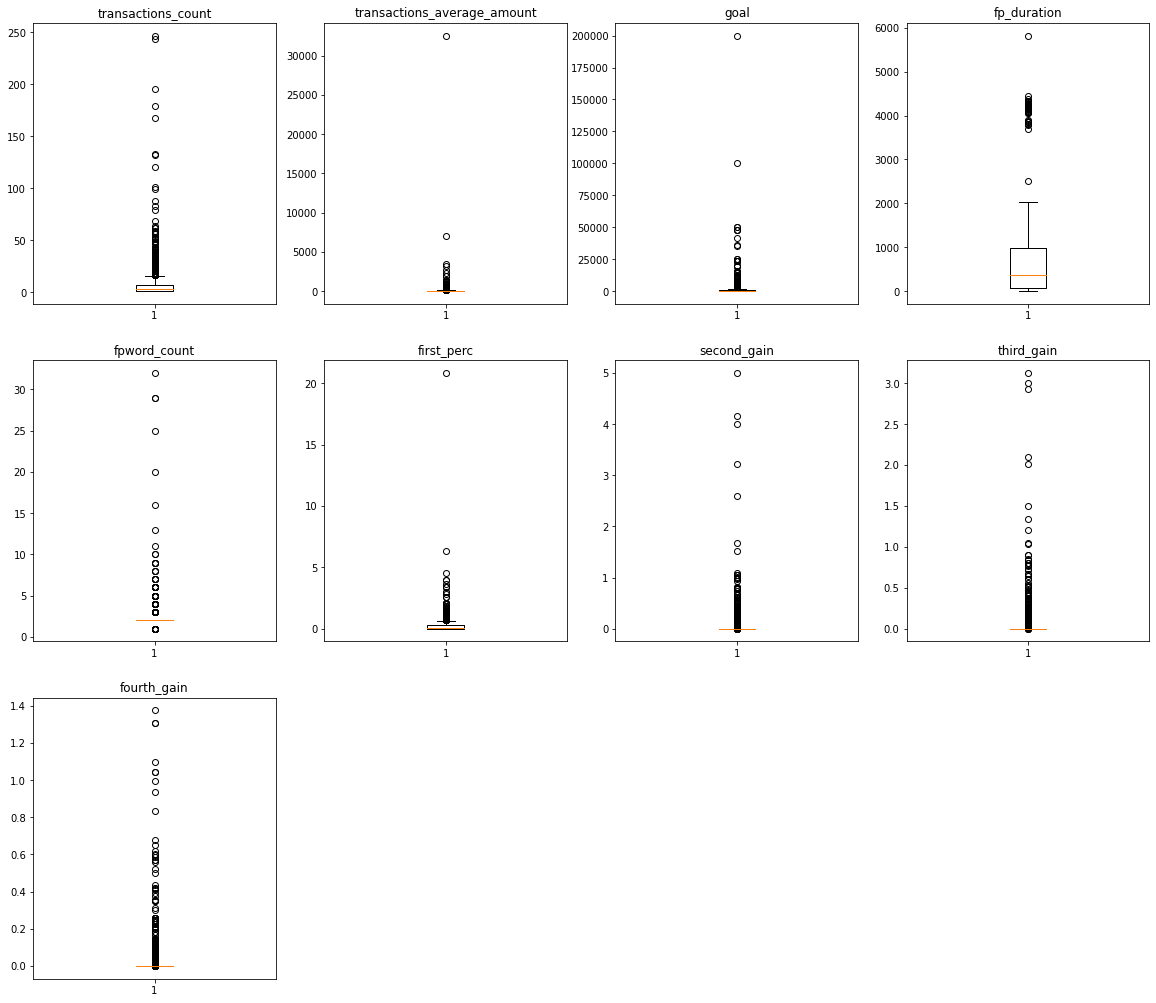

In [ ]:
# i want to plot all the variables so I will need to make a dictionary of columns
fp_dict = {'transactions_count':1,'transactions_average_amount':2,'goal':3,'fp_duration':4,'fpword_count':5,
             'first_perc':6,'second_gain':7,'third_gain':8,'fourth_gain':9}
# excluding hit_goal, is_team_campaign, campaign_type

import matplotlib.pyplot as plt

plt.figure(figsize=(20,30))

for variable,i in fp_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(new_fpdf[variable],whis=1.5)
                     plt.title(variable)
plt.show()

In [ ]:
# verifying existence of outliers with Tukey's Method
for variable in fp_dict.keys():
    q75, q25 = np.percentile(new_fpdf[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print('Number of outliers in {} : {}'.format(variable,
          len((np.where((new_fpdf[variable] > max_val) | 
          (new_fpdf[variable] < min_val))[0])),len((np.where((new_fpdf[variable] > max_val) | 
          (new_fpdf[variable] < min_val))[0]))))

Number of outliers in transactions_count : 136
Number of outliers in transactions_average_amount : 134
Number of outliers in goal : 244
Number of outliers in fp_duration : 41
Number of outliers in fpword_count : 229
Number of outliers in first_perc : 148
Number of outliers in second_gain : 319
Number of outliers in third_gain : 248
Number of outliers in fourth_gain : 182


Good lord! We have a lot of outliers. We'll take care of the outliers with winsorization for the following variables:
- transaction_count: one-way winsorization (high)
- transactions_average_amount: one-way winsorization (high)
- goal: one-way winsorization (high)
- fp_duration: one-way winsorization (high)
- fpword_count: two-way winsorization
- first_perc: one-way winsorization (high)
- second_gain: one-way winsorization (high)
- third_gain: one-way winsorization (high)
- fourth_gain: one-way winsorization (high)

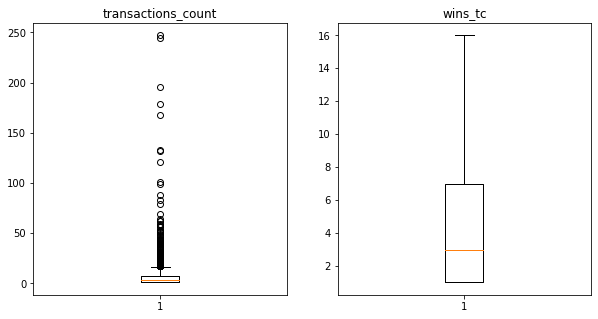

In [ ]:
from scipy.stats.mstats import winsorize # importing winsorize from Scipy

# transaction_count: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
transactions_count = new_fpdf['transactions_count']
plt.boxplot(transactions_count)
plt.title('transactions_count')

plt.subplot(1,2,2) # plot after winsorization
wins_tc = winsorize(new_fpdf['transactions_count'],(0,.1))
plt.boxplot(wins_tc)
plt.title('wins_tc')

plt.show()

(array([1.313e+03, 5.400e+01, 1.300e+01, 4.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([  1. ,  25.6,  50.2,  74.8,  99.4, 124. , 148.6, 173.2, 197.8,
        222.4, 247. ]),
 <a list of 10 Patch objects>)

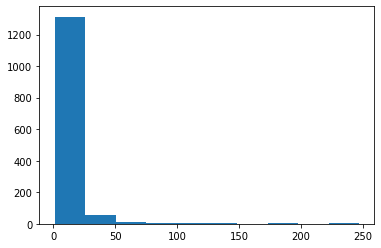

In [ ]:
plt.hist(transactions_count)

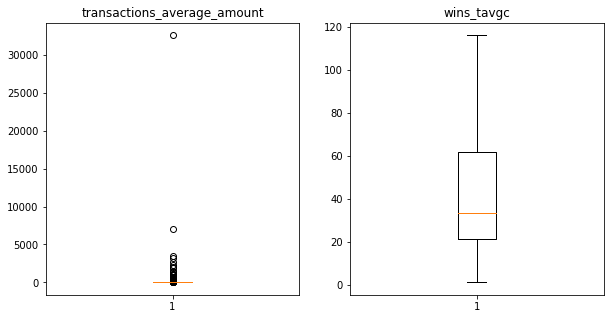

In [ ]:
# transactions_average_amount: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
transactions_average_amount  = new_fpdf['transactions_average_amount']
plt.boxplot(transactions_average_amount)
plt.title('transactions_average_amount')

plt.subplot(1,2,2) # plot after winsorization
wins_tavgc = winsorize(new_fpdf['transactions_average_amount'],(0,.1))
plt.boxplot(wins_tavgc)
plt.title('wins_tavgc')

plt.show()

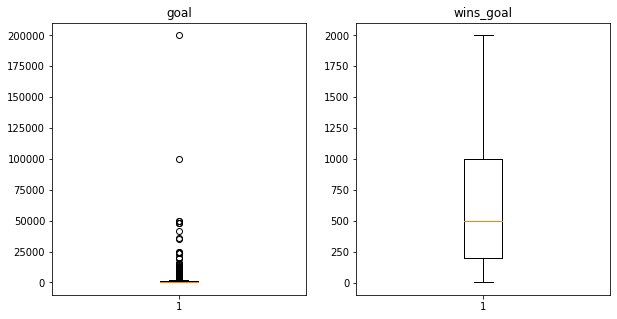

In [ ]:
# goal: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
goal  = new_fpdf['goal']
plt.boxplot(goal)
plt.title('goal')

plt.subplot(1,2,2) # plot after winsorization
wins_goal = winsorize(new_fpdf['goal'],(0,.18))
plt.boxplot(wins_goal)
plt.title('wins_goal')

plt.show()

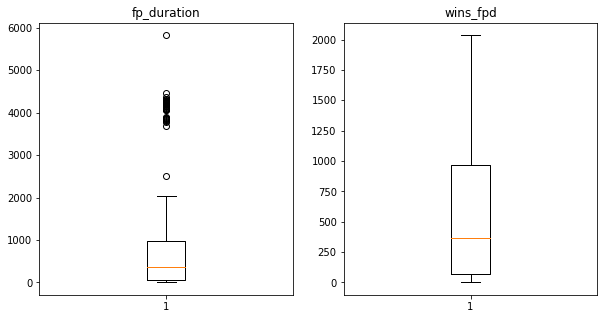

In [ ]:
# fp_duration: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
fp_duration  = new_fpdf['fp_duration']
plt.boxplot(fp_duration)
plt.title('fp_duration')

plt.subplot(1,2,2) # plot after winsorization
wins_fpd = winsorize(new_fpdf['fp_duration'],(0,.03))
plt.boxplot(wins_fpd)
plt.title('wins_fpd')

plt.show()

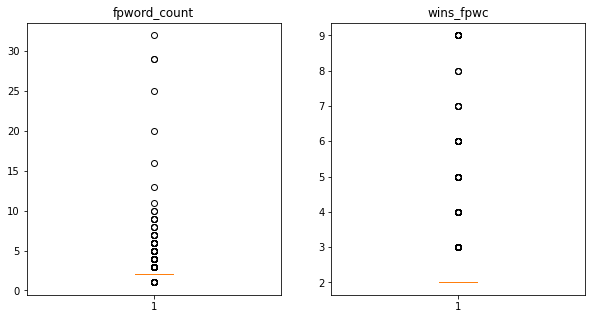

In [ ]:
# fpword_count: two-way winsorization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
fpword_count  = new_fpdf['fpword_count']
plt.boxplot(fpword_count)
plt.title('fpword_count')

plt.subplot(1,2,2) # plot after winsorization
wins_fpwc = winsorize(new_fpdf['fpword_count'],(.02,.01))
plt.boxplot(wins_fpwc)
plt.title('wins_fpwc')

plt.show()

Word count boxplot really doesn't show us much. I will plot on a histogram for better visualization.

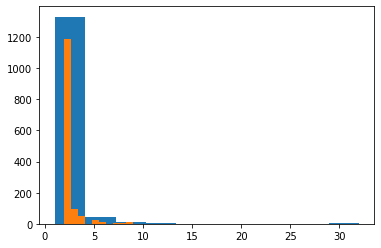

In [ ]:
plt.hist(fpword_count)
plt.hist(wins_fpwc)
plt.show()

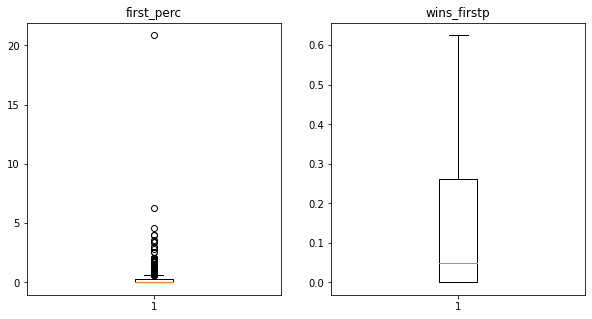

In [ ]:
# first_perc: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
first_perc  = new_fpdf['first_perc']
plt.boxplot(first_perc)
plt.title('first_perc')

plt.subplot(1,2,2) # plot after winsorization
wins_firstp = winsorize(new_fpdf['first_perc'],(0,.11))
plt.boxplot(wins_firstp)
plt.title('wins_firstp')

plt.show()

(array([791., 142.,  75.,  63.,  46.,  40.,  56.,  26., 154.]),
 array([0.        , 0.07777778, 0.15555556, 0.23333333, 0.31111111,
        0.38888889, 0.46666667, 0.54444444, 0.62222222, 0.7       ]),
 <a list of 9 Patch objects>)

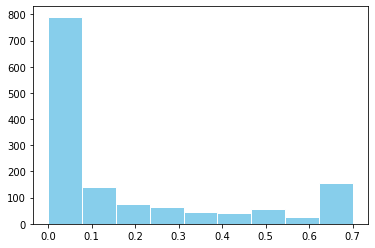

In [ ]:
plt.hist(wins_firstp, 9, range=[0, .7], facecolor='skyblue', edgecolor='white')

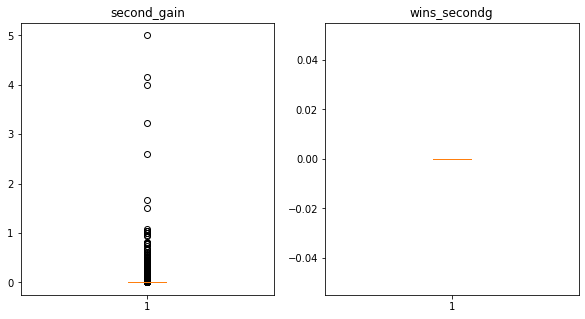

In [ ]:
# second_gain: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
second_gain  = new_fpdf['second_gain']
plt.boxplot(second_gain)
plt.title('second_gain')

plt.subplot(1,2,2) # plot after winsorization
wins_secondg = winsorize(new_fpdf['second_gain'] ,(0,.23))
plt.boxplot(wins_secondg)
plt.title('wins_secondg')

plt.show()

(array([1393.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([0.00000000e+00, 1.11111111e-06, 2.22222222e-06, 3.33333333e-06,
        4.44444444e-06, 5.55555556e-06, 6.66666667e-06, 7.77777778e-06,
        8.88888889e-06, 1.00000000e-05]),
 <a list of 9 Patch objects>)

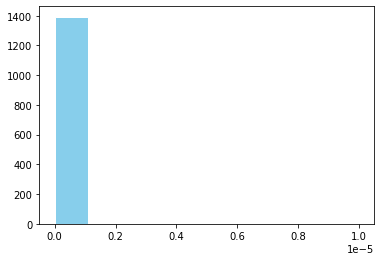

In [ ]:
plt.hist(wins_secondg, 9, range=[0, .00001], facecolor='skyblue', edgecolor='white')

The values are SO tiny! It's hard to visualize. Let me take a look at the third_gain feature.

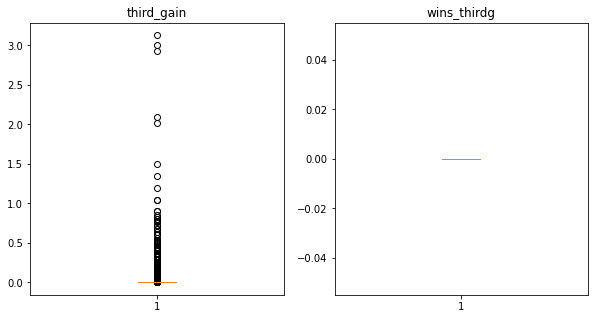

In [ ]:
# third_gain: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
third_gain  = new_fpdf['third_gain']
plt.boxplot(third_gain)
plt.title('third_gain')

plt.subplot(1,2,2) # plot after winsorization
wins_thirdg = winsorize(new_fpdf['third_gain'],(0,.18))
plt.boxplot(wins_thirdg)
plt.title('wins_thirdg')

plt.show()

For third_gain, the boxplot doesn't serve as a good visualization, so I'll use a histogram

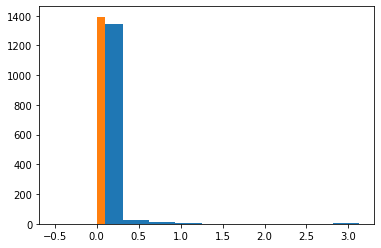

In [ ]:
plt.hist(third_gain)
plt.hist(wins_thirdg)
plt.show()

(array([1393.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([0.00000000e+00, 1.11111111e-08, 2.22222222e-08, 3.33333333e-08,
        4.44444444e-08, 5.55555556e-08, 6.66666667e-08, 7.77777778e-08,
        8.88888889e-08, 1.00000000e-07]),
 <a list of 9 Patch objects>)

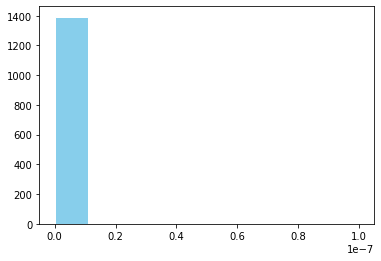

In [ ]:
plt.hist(wins_thirdg, 9, range=[0, .0000001], facecolor='skyblue', edgecolor='white')

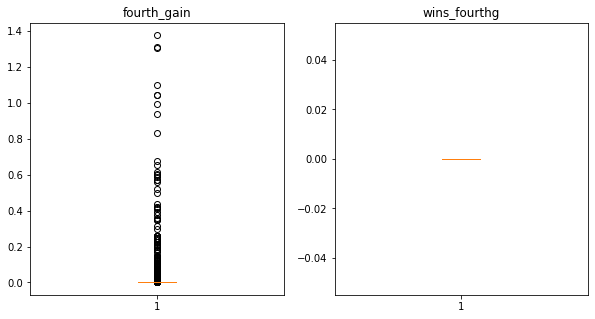

In [ ]:
# third_gain: one-way winsorization (high)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) # original
fourth_gain  = new_fpdf['fourth_gain']
plt.boxplot(fourth_gain)
plt.title('fourth_gain')

plt.subplot(1,2,2) # plot after winsorization
wins_fourthg = winsorize(new_fpdf['fourth_gain'],(0,.14))
plt.boxplot(wins_fourthg)
plt.title('wins_fourthg')

plt.show()

Lordy... Okay! I will be creating a binary (categorical) variable for growth. Anything higher than "0" will be 1 (as in had a transaction in the 2nd, 3rd, and 4th week after the page was created).

In [ ]:
new_fpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hit_goal                     1393 non-null   int64  
 1   transactions_count           1393 non-null   int64  
 2   transactions_average_amount  1393 non-null   float64
 3   goal                         1393 non-null   float64
 4   is_team_captain              1393 non-null   bool   
 5   fp_duration                  1393 non-null   int64  
 6   fpword_count                 1393 non-null   int64  
 7   campaign_type                1393 non-null   object 
 8   first_perc                   1393 non-null   float64
 9   second_gain                  1393 non-null   float64
 10  third_gain                   1393 non-null   float64
 11  fourth_gain                  1393 non-null   float64
dtypes: bool(1), float64(6), int64(4), object(1)
memory usage: 121.2+ KB


In [ ]:
new_fpdf['gain_1'] = np.where(fp_df['first_perc']>0, 1, 0)
new_fpdf['gain_2'] = np.where(fp_df['second_gain']>0, 1, 0)
new_fpdf['gain_3'] = np.where(fp_df['third_gain']>0, 1, 0)
new_fpdf['gain_4'] = np.where(fp_df['fourth_gain']>0, 1, 0)

new_fpdf.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,hit_goal,transactions_count,transactions_average_amount,goal,is_team_captain,fp_duration,fpword_count,campaign_type,first_perc,second_gain,third_gain,fourth_gain,gain_1,gain_2,gain_3,gain_4
0,0,1,10.42,250.0,False,360,2,General,0.041680,0.0000,0.0,0.0,1,0,0,0
1,0,4,42.98,5000.0,False,200,3,General,0.034386,0.0000,0.0,0.0,1,0,0,0
2,0,3,24.07,100.0,False,-1,3,General,0.722100,0.0000,0.0,0.0,1,0,0,0
3,0,5,16.13,100.0,False,26,2,General,0.702100,0.1042,0.0,0.0,1,1,0,0
4,1,9,32.07,200.0,False,27,2,General,1.442950,0.0000,0.0,0.0,1,0,0,0
5,1,7,22.95,100.0,False,1,3,General,1.502500,0.1042,0.0,0.0,1,1,0,0
6,0,1,15.63,100.0,False,30,2,General,0.156300,0.0000,0.0,0.0,1,0,0,0
7,0,2,7.46,100.0,False,26,2,General,0.149100,0.0000,0.0,0.0,1,0,0,0
8,1,3,45.08,125.0,False,8,2,General,1.082000,0.0000,0.0,0.0,1,0,0,0
9,0,1,10.42,12000.0,False,749,3,General,0.000868,0.0000,0.0,0.0,1,0,0,0


I'll add the winsorized features in the dataframe.

In [ ]:
new_fpdf['wins_tc'] = wins_tc
new_fpdf['wins_tavgc'] = wins_tavgc
new_fpdf['wins_goal'] = wins_goal
new_fpdf['wins_fpd'] = wins_fpd
new_fpdf['wins_fpwc'] = wins_fpwc
new_fpdf['wins_firstp'] = wins_firstp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
new_fpdf['wins_secondg'] = wins_secondg
new_fpdf['wins_thirdg'] = wins_thirdg
new_fpdf['wins_fourthg'] = wins_fourthg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
new_fpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hit_goal                     1393 non-null   int64  
 1   transactions_count           1393 non-null   int64  
 2   transactions_average_amount  1393 non-null   float64
 3   goal                         1393 non-null   float64
 4   is_team_captain              1393 non-null   bool   
 5   fp_duration                  1393 non-null   int64  
 6   fpword_count                 1393 non-null   int64  
 7   campaign_type                1393 non-null   object 
 8   first_perc                   1393 non-null   float64
 9   second_gain                  1393 non-null   float64
 10  third_gain                   1393 non-null   float64
 11  fourth_gain                  1393 non-null   float64
 12  gain_1                       1393 non-null   int64  
 13  gain_2            

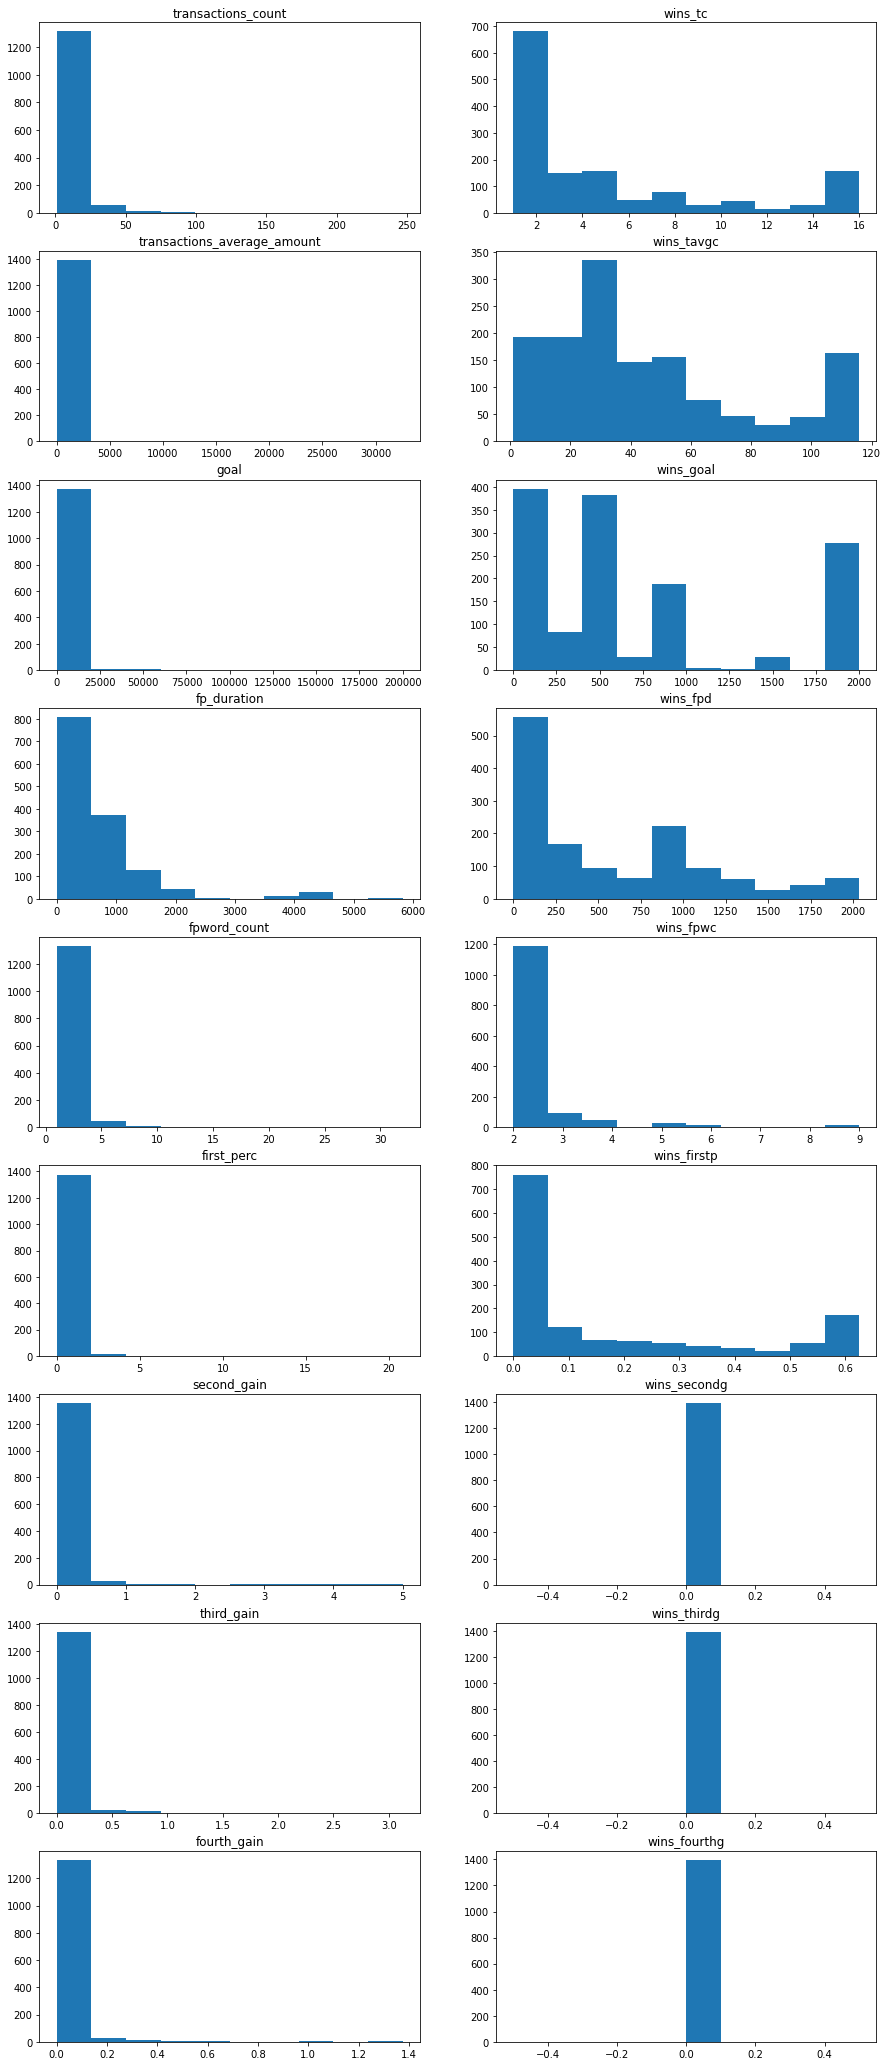

In [ ]:
# create list of all columns (original and winsorized)
all_cols = ['transactions_count','wins_tc','transactions_average_amount','wins_tavgc','goal',
         'wins_goal','fp_duration','wins_fpd','fpword_count','wins_fpwc','first_perc',
         'wins_firstp', 'second_gain', 'wins_secondg', 'third_gain', 'wins_thirdg', 'fourth_gain', 'wins_fourthg']

plt.figure(figsize=(15,75))

for i in range(len(all_cols)):
    plt.subplot(18,2,i+1)
    plt.hist(new_fpdf[all_cols[i]])
    plt.title(all_cols[i])

plt.show()

In [ ]:
new_fpdf.info() # preview new data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hit_goal                     1393 non-null   int64  
 1   transactions_count           1393 non-null   int64  
 2   transactions_average_amount  1393 non-null   float64
 3   goal                         1393 non-null   float64
 4   is_team_captain              1393 non-null   bool   
 5   fp_duration                  1393 non-null   int64  
 6   fpword_count                 1393 non-null   int64  
 7   campaign_type                1393 non-null   object 
 8   first_perc                   1393 non-null   float64
 9   second_gain                  1393 non-null   float64
 10  third_gain                   1393 non-null   float64
 11  fourth_gain                  1393 non-null   float64
 12  gain_1                       1393 non-null   int64  
 13  gain_2            

Getting count plots for progress throughout the weeks

In [ ]:
new_fpdf.describe()

,hit_goal,transactions_count,transactions_average_amount,goal,fp_duration,fpword_count,first_perc,second_gain,third_gain,fourth_gain,gain_1,gain_2,gain_3,gain_4,wins_tc,wins_tavgc,wins_goal,wins_fpd,wins_fpwc,wins_firstp,wins_secondg,wins_thirdg,wins_fourthg
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.0,1393.0,1393.0
mean,0.186648,7.269203,103.804401,2589.522405,639.697057,2.389088,0.252012,0.057348,0.041253,0.023359,0.704953,0.229002,0.178033,0.130653,4.821249,45.273367,772.455693,578.085427,2.332376,0.165500,0.0,0.0,0.0
std,0.389768,16.938785,913.652195,7867.264585,799.814990,1.841631,0.733289,0.273577,0.202383,0.113256,0.456228,0.420342,0.382678,0.337142,4.942521,33.960929,694.208294,574.311551,1.039835,0.220683,0.0,0.0,0.0
min,0.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,2.000000,0.000000,0.0,0.0,0.0
25%,0.000000,1.000000,21.160000,200.000000,68.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.160000,200.000000,68.000000,2.000000,0.000000,0.0,0.0,0.0
50%,0.000000,3.000000,33.330000,500.000000,366.000000,2.000000,0.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,33.330000,500.000000,366.000000,2.000000,0.050000,0.0,0.0,0.0
75%,0.000000,7.000000,61.610000,1000.000000,969.000000,2.000000,0.260500,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,61.610000,1000.000000,969.000000,2.000000,0.260500,0.0,0.0,0.0
max,1.000000,247.000000,32549.000000,200000.000000,5823.000000,32.000000,20.840000,5.001600,3.126000,1.375000,1.000000,1.000000,1.000000,1.000000,16.000000,115.890000,2000.000000,2035.000000,9.000000,0.625000,0.0,0.0,0.0


,gain_1,hit_goal,count
0,0,0,338
1,0,1,73
2,1,0,795
3,1,1,187


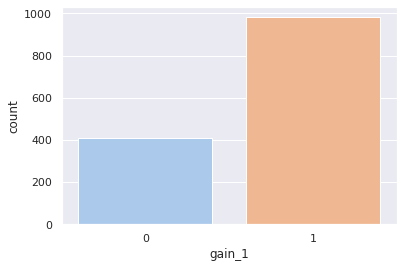

In [ ]:
import seaborn as sns
sns.countplot(x="gain_1", data=new_fpdf, palette="pastel")

new_fpdf.groupby(['gain_1','hit_goal']).size().reset_index(name='count')

In [ ]:
groupped_data = new_fpdf.groupby(['gain_1', 'gain_2', 'gain_3', 'gain_4']).agg({'hit_goal': 'sum'})
groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
groupped_data

hit_goal          %
gain_1 gain_2 gain_3 gain_4                     
0      0      0      0             32  12.307692
                     1              8   3.076923
              1      0             10   3.846154
                     1              2   0.769231
       1      0      0             13   5.000000
                     1              1   0.384615
              1      0              4   1.538462
                     1              3   1.153846
1      0      0      0             94  36.153846
                     1              7   2.692308
              1      0              9   3.461538
                     1              7   2.692308
       1      0      0             22   8.461538
                     1              9   3.461538
              1      0             19   7.307692
                     1             20   7.692308

In [ ]:
groupped_data = new_fpdf.groupby(['hit_goal','gain_1', 'gain_2', 'gain_3', 'gain_4']).hit_goal.agg(['count', 'sum'])
groupped_data

count  sum
hit_goal gain_1 gain_2 gain_3 gain_4            
0        0      0      0      0         202    0
                              1          28    0
                       1      0          29    0
                              1           7    0
                1      0      0          51    0
                              1           2    0
                       1      0          12    0
                              1           7    0
         1      0      0      0         553    0
                              1          26    0
                       1      0          45    0
                              1          15    0
                1      0      0          89    0
                              1           8    0
                       1      0          27    0
                              1          32    0
1        0      0      0      0          32   32
                              1           8    8
                       1      0          10   10
                              1           2    2
                1      0      0          13   13
                              1           1    1
                       1      0           4    4
                              1           3    3
         1      0      0      0          94   94
                              1           7    7
                       1      0           9    9
                              1           7    7
                1      0      0          22   22
                              1           9    9
                       1      0          19   19
                              1          20   20

In [ ]:
groupped_data = new_fpdf.groupby(['hit_goal']).agg({'gain_1': 'sum'})
groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
groupped_data

,gain_1,%
hit_goal,,
0,795,80.95723
1,187,19.04277


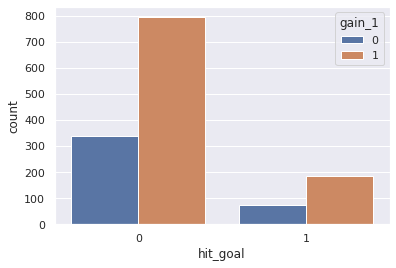

In [ ]:
ax = sns.countplot(x="hit_goal", hue="gain_1", data=new_fpdf)

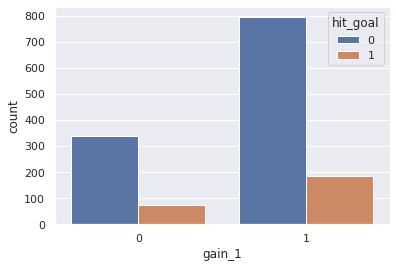

In [ ]:
ax = sns.countplot(x="gain_1", hue="hit_goal", data=new_fpdf)

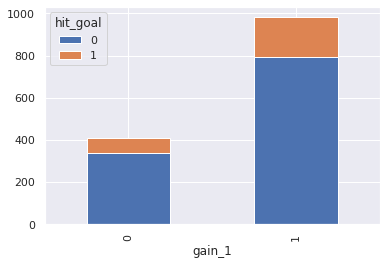

In [ ]:
pd.crosstab(new_fpdf['gain_1'], new_fpdf['hit_goal']).plot(kind='bar', stacked=True)

In [ ]:
new_fpdf.groupby(['gain_2','hit_goal']).size().reset_index(name='count')

,gain_2,hit_goal,count
0,0,0,905
1,0,1,169
2,1,0,228
3,1,1,91


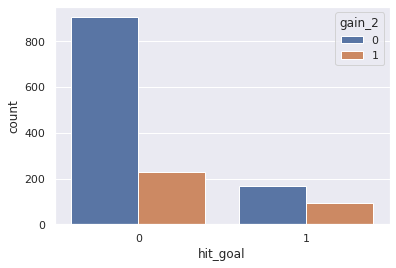

In [ ]:
ax = sns.countplot(x="hit_goal", hue="gain_2", data=new_fpdf)

0    1074
1     319
Name: gain_2, dtype: int64

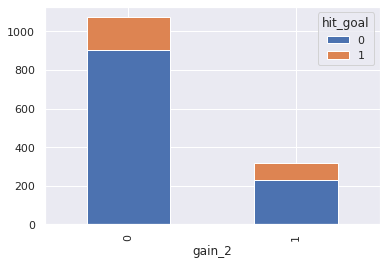

In [ ]:
pd.crosstab(new_fpdf['gain_2'], new_fpdf['hit_goal']).plot(kind='bar', stacked=True)

new_fpdf.gain_2.value_counts()

In [ ]:
new_fpdf.groupby(['gain_3','hit_goal']).size().reset_index(name='count')

,gain_3,hit_goal,count
0,0,0,959
1,0,1,186
2,1,0,174
3,1,1,74


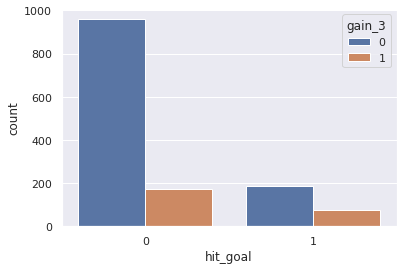

In [ ]:
ax = sns.countplot(x="hit_goal", hue="gain_3", data=new_fpdf)

0    1145
1     248
Name: gain_3, dtype: int64

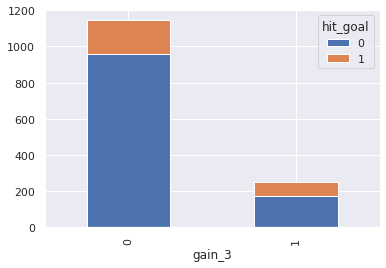

In [ ]:
pd.crosstab(new_fpdf['gain_3'], new_fpdf['hit_goal']).plot(kind='bar', stacked=True)

new_fpdf.gain_3.value_counts()

In [ ]:
new_fpdf.groupby(['gain_4','hit_goal']).size().reset_index(name='count')

,gain_4,hit_goal,count
0,0,0,1008
1,0,1,203
2,1,0,125
3,1,1,57


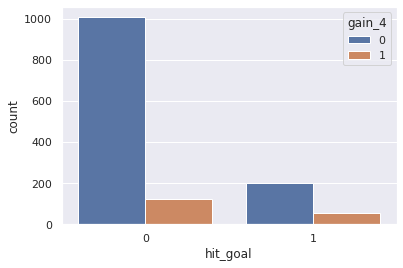

In [ ]:
ax = sns.countplot(x="hit_goal", hue="gain_4", data=new_fpdf)

0    1211
1     182
Name: gain_4, dtype: int64

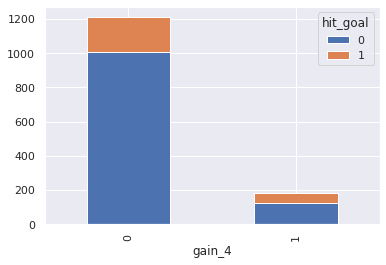

In [ ]:
pd.crosstab(new_fpdf['gain_4'], new_fpdf['hit_goal']).plot(kind='bar', stacked=True)

new_fpdf.gain_4.value_counts()

Now we'll take a look at the categorical feature: campaign_type

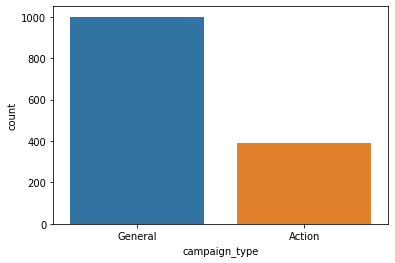

In [ ]:
sns.countplot(x="campaign_type", data=new_fpdf)

In [ ]:
new_fpdf['campaign_type'].value_counts()

General    1000
Action      393
Name: campaign_type, dtype: int64

Since most fundraising pages are under the "General" campaign type, I'll be grouping all the remaining campaigns as "Action" type.

In [ ]:
# replacing campaign types
new_fpdf.replace(['Club','Sweepstakes','Physical','Event','Corporate','FullWell'], 'Action', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
new_fpdf.describe()

,hit_goal,transactions_count,transactions_average_amount,goal,fp_duration,fpword_count,first_perc,second_gain,third_gain,fourth_gain,gain_2,gain_3,gain_4,wins_tc,wins_tavgc,wins_goal,wins_fpd,wins_fpwc,wins_firstp,wins_secondg,wins_thirdg,wins_fourthg
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.0,1393.0,1393.0
mean,0.186648,7.269203,103.804401,2589.522405,639.420675,2.389088,0.252012,0.057348,0.041253,0.023359,0.229002,0.178033,0.130653,4.821249,45.273367,772.455693,577.779612,2.332376,0.165500,0.0,0.0,0.0
std,0.389768,16.938785,913.652195,7867.264585,799.661697,1.841631,0.733289,0.273577,0.202383,0.113256,0.420342,0.382678,0.337142,4.942521,33.960929,694.208294,573.993620,1.039835,0.220683,0.0,0.0,0.0
min,0.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,2.000000,0.000000,0.0,0.0,0.0
25%,0.000000,1.000000,21.160000,200.000000,68.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.160000,200.000000,68.000000,2.000000,0.000000,0.0,0.0,0.0
50%,0.000000,3.000000,33.330000,500.000000,366.000000,2.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,33.330000,500.000000,366.000000,2.000000,0.050000,0.0,0.0,0.0
75%,0.000000,7.000000,61.610000,1000.000000,968.000000,2.000000,0.260500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,61.610000,1000.000000,968.000000,2.000000,0.260500,0.0,0.0,0.0
max,1.000000,247.000000,32549.000000,200000.000000,5823.000000,32.000000,20.840000,5.001600,3.126000,1.375000,1.000000,1.000000,1.000000,16.000000,115.890000,2000.000000,2034.000000,9.000000,0.625000,0.0,0.0,0.0


**Observations**

From looking at the results (stats and plots), it seems like some features are best left as is even with their outliers.
- wins_tc: OK
- wins_tavgc: OK
- wins_goal: The outliers that skew this data is because there are a handful of fundraising pages that are fundraising over 25,000 while the average goal is 2,589. I'm interested in seeing the likelihood of fundraising pages hitting their goal if their goal is below or above the average.
- wins_fpd OK
- wins_fpwc OK (this feature seems the least interesting)
- campaign_type: Most fundraisers commit to general fundraisers versus being a part of a unique campaign.
- wins_firstp, with an average percent towards goal of 16.5%

For the features below, I will be paying attention to both the original and winsorized views. After winsorization, the visualized distribution didn't change much for the features listed below. The winsorized views also don't provide that much insight. This could be because a majority of fundraising pages obtain donations at a gradual rate while there are a handful of pages that have large amounts of donations dumped online at certain times. This could be because some fundraising pages do offline events, collect donations, and upload the total received after the event.
- second_gain, average growth of 6%
- third_gain, average growth of 4%
- fourth_gain, average growth of 2%

Looks like the most fundraising happens in the first week of when the page is created and gradually tapers off as time goes on.

In [ ]:
# dropping useless columns
new_fpdf.drop(['wins_secondg', 'wins_thirdg', 'wins_fourthg'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Multivariate Analysis

First, I'll look at the correlation matrix between numerical features.

In [ ]:
new_fpdf.corr()

,hit_goal,transactions_count,transactions_average_amount,goal,is_team_captain,fp_duration,fpword_count,first_perc,second_gain,third_gain,fourth_gain,gain_2,gain_3,gain_4,wins_tc,wins_tavgc,wins_goal,wins_fpd,wins_fpwc,wins_firstp
hit_goal,1.000000,0.169637,0.016698,-0.094679,-0.013952,-0.032172,-0.014174,0.351190,0.250928,0.250948,0.220882,0.137944,0.133469,0.125904,0.278742,0.183247,-0.212921,-0.053701,0.006349,0.393754
transactions_count,0.169637,1.000000,0.000841,0.290473,0.081031,0.094990,0.106557,0.002810,0.075761,0.072612,0.098603,0.290191,0.350572,0.370972,0.618885,0.198931,0.327746,0.109293,0.197991,0.002656
transactions_average_amount,0.016698,0.000841,1.000000,0.171895,0.001108,0.020715,0.068904,-0.014872,-0.001040,0.169889,-0.003357,-0.005604,0.081439,0.017429,0.000454,0.170475,0.107411,0.034909,0.126052,-0.029796
goal,-0.094679,0.290473,0.171895,1.000000,0.040238,0.101165,0.111242,-0.088756,-0.031546,-0.000520,-0.028427,0.066732,0.118664,0.135211,0.215279,0.201278,0.496942,0.093585,0.197577,-0.173151
is_team_captain,-0.013952,0.081031,0.001108,0.040238,1.000000,0.084939,0.162632,-0.060159,-0.010814,-0.003176,0.056328,0.013595,0.021549,0.062707,0.058024,0.090692,0.127006,0.092657,0.150201,-0.100659
fp_duration,-0.032172,0.094990,0.020715,0.101165,0.084939,1.000000,0.121974,-0.098516,-0.029793,-0.019613,0.038491,0.031584,0.067258,0.059514,0.136540,0.025839,0.207357,0.913498,0.145601,-0.147509
fpword_count,-0.014174,0.106557,0.068904,0.111242,0.162632,0.121974,1.000000,-0.039690,-0.004500,0.017938,0.018496,0.047218,0.096335,0.062695,0.103145,0.078179,0.144504,0.155433,0.830505,-0.068942
first_perc,0.351190,0.002810,-0.014872,-0.088756,-0.060159,-0.098516,-0.039690,1.000000,0.061089,0.015415,-0.030144,-0.012568,-0.022979,-0.050934,0.049161,0.002545,-0.213764,-0.131823,-0.046171,0.546775
second_gain,0.250928,0.075761,-0.001040,-0.031546,-0.010814,-0.029793,-0.004500,0.061089,1.000000,0.097193,0.024727,0.384769,0.075374,0.028456,0.140399,0.080839,-0.087913,-0.047779,0.012418,0.037038
third_gain,0.250948,0.072612,0.169889,-0.000520,-0.003176,-0.019613,0.017938,0.015415,0.097193,1.000000,0.073504,0.087334,0.438146,0.094394,0.139386,0.139999,-0.014335,-0.028047,0.039965,-0.004794


Text(0, 0.5, 'Fundraising Page Count')

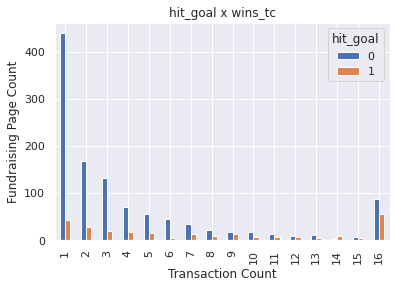

In [ ]:
# winsorized transaction count
pd.crosstab(new_fpdf.wins_tc,new_fpdf.hit_goal).plot(kind='bar')
plt.title('hit_goal x wins_tc')
plt.xlabel('Transaction Count')
plt.ylabel('Fundraising Page Count')

In [ ]:
new_fpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hit_goal                     1393 non-null   int64  
 1   transactions_count           1393 non-null   int64  
 2   transactions_average_amount  1393 non-null   float64
 3   goal                         1393 non-null   float64
 4   is_team_captain              1393 non-null   bool   
 5   fp_duration                  1393 non-null   int64  
 6   fpword_count                 1393 non-null   int64  
 7   campaign_type                1393 non-null   object 
 8   first_perc                   1393 non-null   float64
 9   second_gain                  1393 non-null   float64
 10  third_gain                   1393 non-null   float64
 11  fourth_gain                  1393 non-null   float64
 12  gain_1                       1393 non-null   int64  
 13  gain_2            

In [ ]:
# winsorized transaction avg x winsorized goal
from altair import *
Chart(new_fpdf).mark_point().encode(x='wins_tavgc',y='wins_goal', color='hit_goal')

alt.Chart(...)

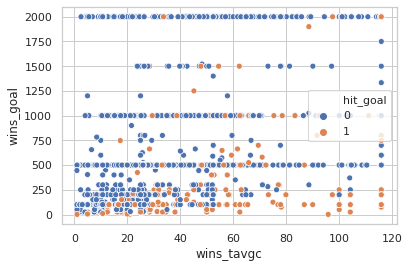

In [ ]:
ax = sns.scatterplot(x="wins_tavgc", y="wins_goal", hue="hit_goal",
                     data=new_fpdf)

In [ ]:
#creating scatterplot with transactions and hit_goal
# winsorized transaction avg x winsorized goal
from altair import *
Chart(new_fpdf).mark_point().encode(x='wins_tc',y='wins_goal', color='hit_goal')

alt.Chart(...)

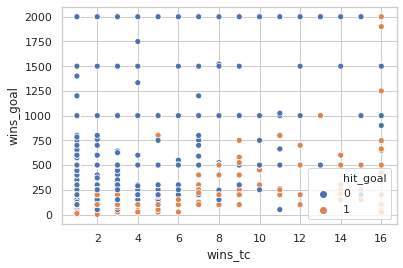

In [ ]:
ax = sns.scatterplot(x="wins_tc", y="wins_goal", hue="hit_goal",
                     data=new_fpdf)

In [ ]:
#creating scatterplot with transactions and hit_goal
# winsorized transaction avg x winsorized goal
# convert hit_goal to categorical then scatter plot
from altair import *
Chart(new_fpdf).mark_point().encode(x='wins_tavgc',y='wins_tc', color='hit_goal')

alt.Chart(...)

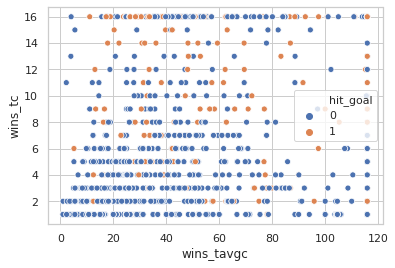

In [ ]:
ax = sns.scatterplot(x="wins_tavgc", y="wins_tc", hue="hit_goal",
                     data=new_fpdf)

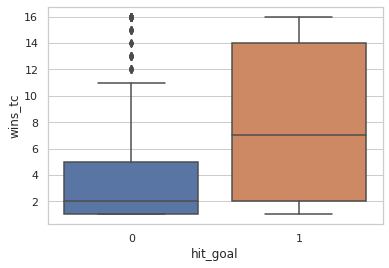

In [ ]:
# boxplot the average transaction amount / each page and hit_goal
sns.set(style="whitegrid")

ax = sns.boxplot(x="hit_goal", y="wins_tc", data=new_fpdf)

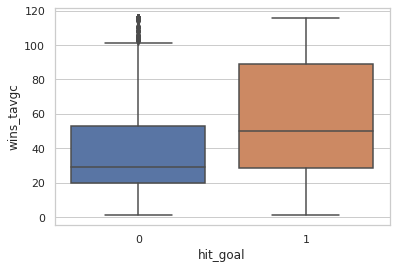

In [ ]:
# boxplot with transaction count and hit_goal
sns.set(style="whitegrid")

ax = sns.boxplot(x="hit_goal", y="wins_tavgc", data=new_fpdf)

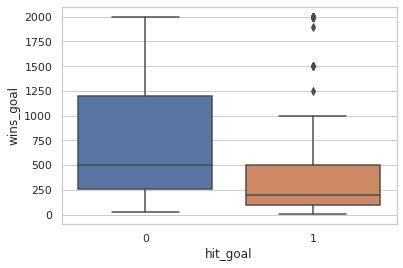

In [ ]:
# boxplot with goal and hit_goal
sns.set(style="whitegrid")

ax = sns.boxplot(x="hit_goal", y="wins_goal", data=new_fpdf)

Text(0, 0.5, 'Fundraising Page Count')

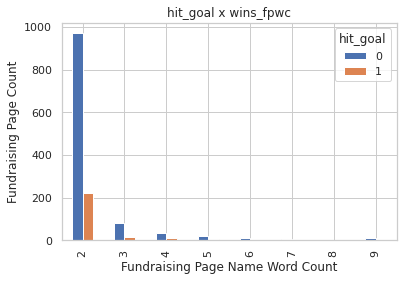

In [ ]:
# winsorized fundraising page name word count
pd.crosstab(new_fpdf.wins_fpwc,new_fpdf.hit_goal).plot(kind='bar')
plt.title('hit_goal x wins_fpwc')
plt.xlabel('Fundraising Page Name Word Count')
plt.ylabel('Fundraising Page Count')

Text(0, 0.5, 'Fundraising Page Count')

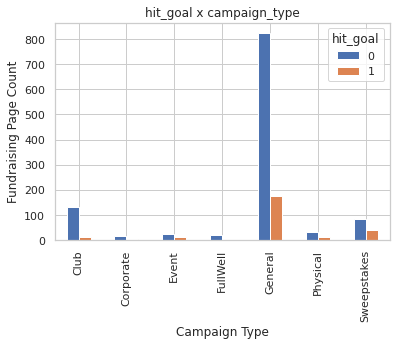

In [ ]:
# campaign type
pd.crosstab(new_fpdf.campaign_type,new_fpdf.hit_goal).plot(kind='bar')
plt.title('hit_goal x campaign_type')
plt.xlabel('Campaign Type')
plt.ylabel('Fundraising Page Count')

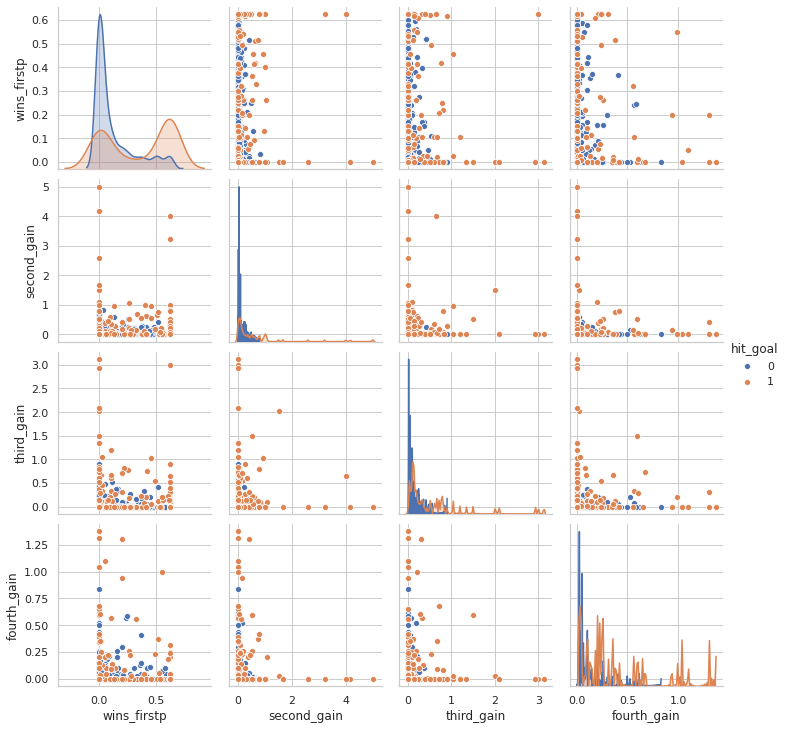

In [ ]:
# % of goal hit within the first week and growth for the next three weeks
g = sns.pairplot(new_fpdf, vars=['wins_firstp', 'second_gain', 'third_gain', 'fourth_gain'],hue="hit_goal")

In [ ]:
new_fpdf.var() # checking for variance for final features

hit_goal                       1.519193e-01
transactions_count             2.869224e+02
transactions_average_amount    8.347603e+05
goal                           6.189385e+07
is_team_captain                6.421269e-02
fp_duration                    6.397040e+05
fpword_count                   3.391605e+00
first_perc                     5.377134e-01
second_gain                    7.484422e-02
third_gain                     4.095872e-02
fourth_gain                    1.282702e-02
gain_1                         2.081436e-01
gain_2                         1.766870e-01
gain_3                         1.464424e-01
gain_4                         1.136646e-01
wins_tc                        2.442851e+01
wins_tavgc                     1.153345e+03
wins_goal                      4.819252e+05
wins_fpd                       3.298338e+05
wins_fpwc                      1.081257e+00
wins_firstp                    4.870092e-02
wins_secondg                   0.000000e+00
wins_thirdg                    0

In [ ]:
# converting campaign_type to numerical
new_fpdf['c_type'] = np.where(new_fpdf['campaign_type'] == "General", 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_fpdf['c_type'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: c_type, dtype: int64

In [ ]:
new_fpdf.drop(columns=['campaign_type'], axis=1, inplace=True)
list(new_fpdf.columns)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['hit_goal',
 'transactions_count',
 'transactions_average_amount',
 'goal',
 'is_team_captain',
 'fp_duration',
 'fpword_count',
 'first_perc',
 'second_gain',
 'third_gain',
 'fourth_gain',
 'gain_1',
 'gain_2',
 'gain_3',
 'gain_4',
 'wins_tc',
 'wins_tavgc',
 'wins_goal',
 'wins_fpd',
 'wins_fpwc',
 'wins_firstp',
 'wins_secondg',
 'wins_thirdg',
 'wins_fourthg',
 'c_type']

In [ ]:
# dropping features with low variance
from sklearn.feature_selection import VarianceThreshold

data = new_fpdf.loc[:, new_fpdf.columns != 'y']
target = new_fpdf.loc[:, new_fpdf.columns != 'y']

# Create VarianceThreshold object with a variance with a threshold of 0.5
thresholder = VarianceThreshold(threshold=.5)

# Conduct variance thresholding
data_high_variance = thresholder.fit_transform(data)

###Explore Target Variable

We'll also get the counts for our target variable.

In [ ]:
new_fpdf['hit_goal'].value_counts()

0    1133
1     260
Name: hit_goal, dtype: int64

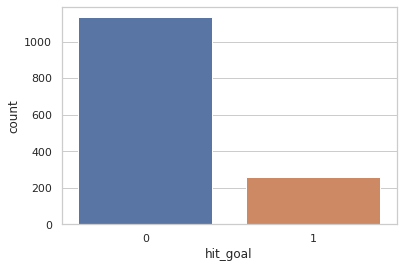

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='hit_goal',data=new_fpdf)
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_sub = len(new_fpdf[new_fpdf['hit_goal']==0])
count_sub = len(new_fpdf[new_fpdf['hit_goal']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of pages that don't hit their goal is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of pages that hit their goal is", pct_of_sub*100)

percentage of pages that don't hit their goal is 81.33524766690596
percentage of pages that hit their goal is 18.664752333094043


Our classes are imbalanced, and the ratio of not hitting the fundraising goal to those that hit their goal is 81:19. I'm going to explore the target variable more.

In [ ]:
new_fpdf.groupby('hit_goal').mean()

,transactions_count,transactions_average_amount,goal,is_team_captain,fp_duration,fpword_count,first_perc,second_gain,third_gain,fourth_gain,gain_1,gain_2,gain_3,gain_4,wins_tc,wins_tavgc,wins_goal,wins_fpd,wins_fpwc,wins_firstp,wins_secondg,wins_thirdg,wins_fourthg,c_type
hit_goal,,,,,,,,,,,,,,,,,,,,,,,,
0,5.893204,96.498676,2946.215790,0.070609,652.016770,2.401589,0.128692,0.024474,0.016933,0.011380,0.701677,0.201236,0.153575,0.110327,4.161518,42.293257,843.237917,592.845543,2.329214,0.123889,0.0,0.0,0.0,0.727273
1,13.265385,135.640500,1035.162385,0.061538,586.011538,2.334615,0.789402,0.200600,0.147235,0.075562,0.719231,0.350000,0.284615,0.219231,7.696154,58.259769,464.008538,513.765385,2.346154,0.346829,0.0,0.0,0.0,0.676923


**Observations**
- Fundraising pages that hit their goal have lower goals on average
- Fundraising pages that hit their goal have more than double the count of transactions than fundraising pages that don't
- Although fundraising pages that hit their goal have lower goals, they average higher transaction amounts.
- Fundraising pages that hit their goal are shorter on average
- Fundraising pages that hit their goal hit 79% of their goal in the first week.
- Fundraising pages that hit their goal have consistently larger growth throughout the weeks than fundraising pages that don't.

### Train / Test / Split

Our data is imbalanced because there is not a lot of pages who did not hit their fundraising goal. I will oversample using SMOTE.
1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [ ]:
from sklearn.model_selection import train_test_split

X = new_fpdf.drop(['hit_goal'], axis=1)
y = new_fpdf['hit_goal']

# oversampling with SMOTE
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['hit_goal'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of fundraising pages not hitting their goal in oversampled data",len(os_data_y[os_data_y['hit_goal']==0]))
print("Number of fundraising pages hitting their goal",len(os_data_y[os_data_y['hit_goal']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['hit_goal']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['hit_goal']==1])/len(os_data_X))

length of oversampled data is  1584
Number of fundraising pages not hitting their goal in oversampled data 792
Number of fundraising pages hitting their goal 792
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


I'll also be using recursive feature elimination to repeatedly construct a model and select features by recursively considering smaller and smaller sets of features.

In [ ]:
data_final_vars=new_fpdf.columns.values.tolist()
y=['hit_goal']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True]
[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 5 3 1]


In [ ]:
new_fpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hit_goal                     1393 non-null   int64  
 1   transactions_count           1393 non-null   int64  
 2   transactions_average_amount  1393 non-null   float64
 3   goal                         1393 non-null   float64
 4   is_team_captain              1393 non-null   bool   
 5   fp_duration                  1393 non-null   int64  
 6   fpword_count                 1393 non-null   int64  
 7   first_perc                   1393 non-null   float64
 8   second_gain                  1393 non-null   float64
 9   third_gain                   1393 non-null   float64
 10  fourth_gain                  1393 non-null   float64
 11  gain_1                       1393 non-null   int64  
 12  gain_2                       1393 non-null   int64  
 13  gain_3            

In [ ]:
cols=['wins_tc', 'wins_tavgc', 'wins_goal', 'wins_fpd', 'wins_fpwc', 'c_type', 'wins_firstp', 
      'second_gain', 'gain_2', 'third_gain', 'gain_3', 'fourth_gain', 'gain_4'] 

X=os_data_X[cols]
y=os_data_y['hit_goal']

**Implementing model**

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.391650
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.435      
Dependent Variable: hit_goal         AIC:              1252.7488  
Date:               2020-08-02 09:00 BIC:              1284.9550  
No. Observations:   1584             Log-Likelihood:   -620.37    
Df Model:           5                LL-Null:          -1097.9    
Df Residuals:       1578             LLR p-value:      3.0899e-204
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
wins_tc        0.3788    0.0278   13.6250  0.0000   0.3243   0.4333
wins_tavgc     0.0297    0.0027   11.1750  0.0000

Okay we definitely gotta drop gain_3 and gain_4

In [ ]:
cols=['wins_tc', 'wins_tavgc', 'wins_goal', 'c_type', 'wins_firstp', 
      'second_gain'] 

X=os_data_X[cols]
y=os_data_y['hit_goal']

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.391650
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.435      
Dependent Variable: hit_goal         AIC:              1252.7488  
Date:               2020-08-02 09:32 BIC:              1284.9550  
No. Observations:   1584             Log-Likelihood:   -620.37    
Df Model:           5                LL-Null:          -1097.9    
Df Residuals:       1578             LLR p-value:      3.0899e-204
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
wins_tc        0.3788    0.0278   13.6250  0.0000   0.3243   0.4333
wins_tavgc     0.0297    0.0027   11.1750  0.0000

NOTE: This table is a log-likelihood ratio test so the coefficients are in log-odds terms.
- Probability is the probability an event happens. For example, there might be an 80% chance of rain today.
- Odds (more technically the odds of success) is defined as probability of success/probability of failure. So the odds of a success (80% chance of rain) has an accompanying odds of failure (20% chance it doesn’t rain); as an equation (the “odds ratio“), that’s .8/.2 = 4.
- Log odds is the logarithm of the odds. Ln(4) = 1.38629436 ≅ 1.386.
- Taking the logarithm of the odds ratio gives us the log odds of A, which can be written as: log(A) = log(P(A)/P(-A)),

**Interpretations:** 
- The p-values for all the variables are smaller than .05 so I will be keeping them.

For positive correlations:
- Each one unit change in wins_tc (transaction count) will increase the log odds of a fundraising page hitting it's goal by .38.
- Each one unit change in wins_tavgc (average transaction amount) will increase the log odds of a fundraising page hitting it's goal by .03.
- Each one unit change in first_perc (percentage towards goal within 7 days of page creation) will increase the log odds of a fundraising page hitting it's goal by 2.16
- Each one unit change in second_gain (percentage gain within 7-14 days of the fundraising page being created) will increase the log odds of a fundraising page hitting it's goal by 2.68
- Each one unit change in third_gain (percentage gain within 14-21 days of the fundraising page being created) will increase the log odds of a fundraising page hitting it's goal by 4.3
- Each one unit change in fourth_gain (percentage gain within 21-28 days of the fundraising page being created) will increase the log odds of a fundraising page hitting it's goal by 5.79


For negative correlations:
- Each one unit change in wins_goal (goal of fundraising page) decrease the log odds of a fundraising page to hit it's goal by 0.0035
- Each one unit change in wins_fpd (duration of fundraising page campaign) decrease the log odds of a fundraising page to hit it's goal by 0.0005
- Each one unit change in wins_fpwc (the number of words in fundraiser page name) decrease the log odds of a fundraising page to hit it's goal by 0.72
- A fundraising page under the general campaign type decreases the log odds a fundraising page to hit it's goal by -1.70  

The interpretation of coefficients in the log-odds term does not make much sense if you need to report it in your article or publication. That is why the concept of odds ratio was introduced.

The ODDS is the ratio of the probability of an event occurring to the event not occurring. When we take a ratio of two such odds it called Odds Ratio.

In [ ]:
print(np.exp(result.params))

wins_tc        1.460485
wins_tavgc     1.030108
wins_goal      0.995922
c_type         0.136151
wins_firstp    1.964931
second_gain    6.957375
dtype: float64


Even though the interpretation of ODDS ratio is far better than log-odds interpretation, still it is not as intuitive as linear regression coefficients; where one can directly interpret that how much a dependent variable will change if making one unit change in the independent variable, keeping all other variables constant. Thus, to get similar interpretation a new econometric measure often used called Marginal Effects.

There are three types of marginal effects reported by researchers: Marginal Effect at Representative values (MERs), Marginal Effects at Means (MEMs) and Average Marginal Effects at every observed value of x and average across the results (AMEs), (Leeper, 2017). For categorical variables, the average marginal effects were calculated for every discrete change corresponding to the reference level.
The statsmodels library offers the following Marginal Effects computation:
- Overall: The avg of the marginal effects at each observation
- Mean: The marginal effects at the mean of each regressor
- Median: The marginal effects at the median of each regressor
- Zero: The marginal effects at zero for each regressor
- All: The marginal effects at each observation.

In [ ]:
from statsmodels.tools.tools import add_constant

AME = result.get_margeff(at='overall', method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:               hit_goal
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
wins_tc         0.0477      0.003     17.765      0.000       0.042       0.053
wins_tavgc      0.0037      0.000     13.341      0.000       0.003       0.004
wins_goal      -0.0005   2.34e-05    -21.954      0.000      -0.001      -0.000
c_type         -0.2511      0.016    -15.869      0.000      -0.282      -0.220
wins_firstp     0.0851      0.035      2.434      0.015       0.017       0.154
second_gain     0.2443      0.065      3.778      0.000       0.118       0.371


In [ ]:
new_fpdf.mean()

hit_goal                          0.186648
transactions_count                7.269203
transactions_average_amount     103.804401
goal                           2589.522405
is_team_captain                   0.068916
fp_duration                     639.697057
fpword_count                      2.389088
first_perc                        0.252012
second_gain                       0.057348
third_gain                        0.041253
fourth_gain                       0.023359
gain_1                            0.704953
gain_2                            0.229002
gain_3                            0.178033
gain_4                            0.130653
wins_tc                           4.821249
wins_tavgc                       45.273367
wins_goal                       772.455693
wins_fpd                        578.085427
wins_fpwc                         2.332376
wins_firstp                       0.165500
wins_secondg                      0.000000
wins_thirdg                       0.000000
wins_fourth

The Average Marginal Effets table reports AMEs, standard error, z-values, p-values and 95% confidence intervals. The interpretation of AMEs is similar to linear models. 

For example, the AME value of first_perc is 0.2078 which can be interpreted as a unit increase in first_perc value increases the likelihood of a fundraising page by 20.78%.

List of features:
- wins_goal
- wins_tavgc
- wins_tc
- c_type
- wins_firstp
- gain_2

In [ ]:
new_fpdf.mean()

hit_goal                          0.186648
transactions_count                7.269203
transactions_average_amount     103.804401
goal                           2589.522405
is_team_captain                   0.068916
fp_duration                     639.697057
fpword_count                      2.389088
first_perc                        0.252012
second_gain                       0.057348
third_gain                        0.041253
fourth_gain                       0.023359
gain_1                            0.704953
gain_2                            0.229002
gain_3                            0.178033
gain_4                            0.130653
wins_tc                           4.821249
wins_tavgc                       45.273367
wins_goal                       772.455693
wins_fpd                        578.085427
wins_fpwc                         2.332376
wins_firstp                       0.165500
wins_secondg                      0.000000
wins_thirdg                       0.000000
wins_fourth

### Model Fitting

**Logistic Regression**

In [ ]:
from mlxtend.plotting import plot_decision_regions
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import metrics

In [ ]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


**L2 regularization**

Train another model with L2 regularization (ridge regression) and compare the accuracy of the new model to the previous one.

Regularization basically adds the penalty as model complexity increases. Regularization parameter (lambda) penalizes all the parameters except intercept so that model generalizes the data and won’t overfit.

In [ ]:
# regularized logistic regression model
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9128205128205128
Score on test data:  0.9138755980861244


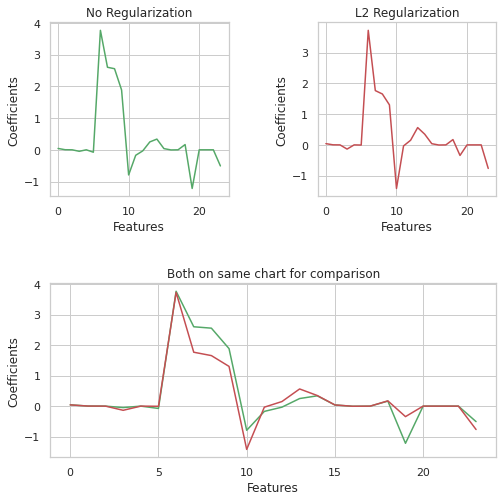

In [ ]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.5)


x = np.arange(0, len(lr.coef_[0]),1)
y = lr.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel='Features', ylabel='Coefficients')
ax1.set_title('No Regularization')

y_reg = lr_regularized.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')

ax3.set(xlabel='Features', ylabel='Coefficients')
ax3.set_title('Both on same chart for comparison')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: 0.44952
Feature: 1, Score: 0.04353
Feature: 2, Score: -0.00437
Feature: 3, Score: -0.88414
Feature: 4, Score: 2.84517
Feature: 5, Score: 1.69219


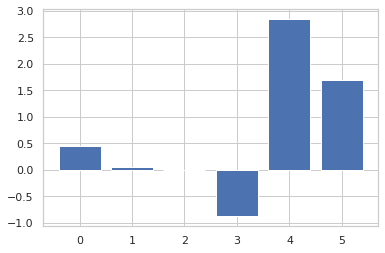

In [ ]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

cols=['wins_tc', 'wins_tavgc', 'wins_goal', 'c_type', 'wins_firstp', 
      'second_gain'] 

X=os_data_X[cols]
y=os_data_y['hit_goal']

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

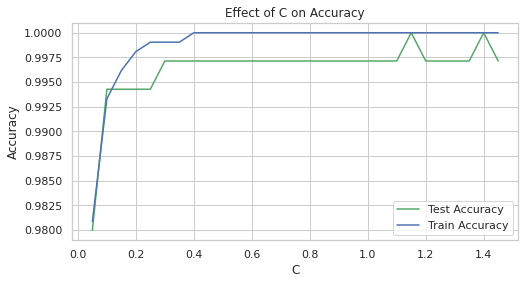

In [ ]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[282   0]
 [  1  66]]


The result is telling us that we have 384 (334+52) correct predictions and 32 (25+7) incorrect predictions.

**Computing precision, recall, F-measure, and support**

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      0.99      0.99        67

    accuracy                           1.00       349
   macro avg       1.00      0.99      1.00       349
weighted avg       1.00      1.00      1.00       349



Precision: determines the accuracy of positive predictions.

Recall: determines the fraction of positives that were correctly identified.

F1 Score: is a weighted harmonic mean of precision and recall with the best score of 1 and the worst score of 0. F1 score conveys the balance between the precision and the recall.

**Interpretation:** The classification report revealed that the micro average of F1 score is about 0.92, which indicates that the trained model has a classification strength of 92%.

**ROC Curve**

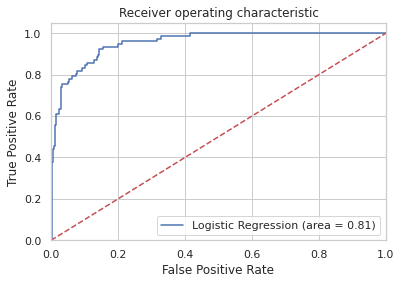

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Interpretation:** The dotted line represents the receiver operating characteric (ROC) curve of a purely random classifier. A good classifier stays as far away from the dotted line as possible.

**Random Forest**

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification

# summarize the dataset
print(X.shape, y.shape)

(1584, 6) (1584,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std

# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.935 (0.020)


In [ ]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, y, cv=10)

array([0.90566038, 0.88050314, 0.94339623, 0.93081761, 0.94303797,
       0.93037975, 0.98101266, 0.97468354, 0.93670886, 0.96202532])

**Boosting**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import itertools

# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***

params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


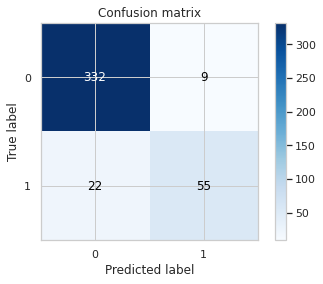

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


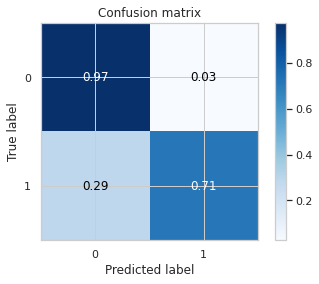

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
clf.score(X_test, y_test)

0.9258373205741627

In [ ]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.859375

In [ ]:
recall_score(y_test,y_pred)

0.7142857142857143

IndexError: ignored

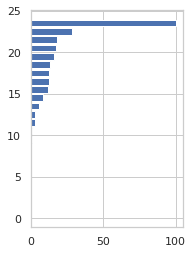

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()